# __Appendix A__

## Assignment 5: Build and Evaluate Classification Models
Dawud Ujamaa  
School of Technology & Engineering, National University  
TIM-8555: Predictive Analysis  
Dr. Larry Fulton  
December 8, 2024 

### __2. Complete Applied Question #13 on pages 196 and 1972 of ISLR Python.__
This question should be answered using the Weekly data set, which is part of the ISLP package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1, 089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA ,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import RepeatedStratifiedKFold 
from sklearn.svm import LinearSVC as svc

In [2]:
# import Weekly data set
# https://islp.readthedocs.io/en/latest/datasets/Weekly.html

from ISLP import load_data
Weekly = load_data('Weekly')
Weekly

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up
...    ...    ...    ...    ...    ...    ...       ...    ...       ...
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up

[1089 rows x 9 columns]

#### __(a) Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?__

In [3]:
# Generate descriptive statistics
Weekly.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1089.000000  1089.000000  1089.000000  1089.000000  1089.000000   
mean   2000.048669     0.150585     0.151079     0.147205     0.145818   
std       6.033182     2.357013     2.357254     2.360502     2.360279   
min    1990.000000   -18.195000   -18.195000   -18.195000   -18.195000   
25%    1995.000000    -1.154000    -1.154000    -1.158000    -1.158000   
50%    2000.000000     0.241000     0.241000     0.241000     0.238000   
75%    2005.000000     1.405000     1.409000     1.409000     1.409000   
max    2010.000000    12.026000    12.026000    12.026000    12.026000   

              Lag5       Volume        Today  
count  1089.000000  1089.000000  1089.000000  
mean      0.139893     1.574618     0.149899  
std       2.361285     1.686636     2.356927  
min     -18.195000     0.087465   -18.195000  
25%      -1.166000     0.332022    -1.154000  
50%       0.234000     1.002680     0.241000  
75%       1.405000     2.053727     1.405000  
max      12.026000     9.328214    12.026000

In [4]:
# check for missing values
missing_values = Weekly.isnull().sum()
print(missing_values)

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64


In [5]:
# compute correlation matrix
Weekly.corr()

Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000 -0.032289 -0.033390 -0.030006 -0.031128 -0.030519  0.841942   
Lag1   -0.032289  1.000000 -0.074853  0.058636 -0.071274 -0.008183 -0.064951   
Lag2   -0.033390 -0.074853  1.000000 -0.075721  0.058382 -0.072499 -0.085513   
Lag3   -0.030006  0.058636 -0.075721  1.000000 -0.075396  0.060657 -0.069288   
Lag4   -0.031128 -0.071274  0.058382 -0.075396  1.000000 -0.075675 -0.061075   
Lag5   -0.030519 -0.008183 -0.072499  0.060657 -0.075675  1.000000 -0.058517   
Volume  0.841942 -0.064951 -0.085513 -0.069288 -0.061075 -0.058517  1.000000   
Today  -0.032460 -0.075032  0.059167 -0.071244 -0.007826  0.011013 -0.033078   

           Today  
Year   -0.032460  
Lag1   -0.075032  
Lag2    0.059167  
Lag3   -0.071244  
Lag4   -0.007826  
Lag5    0.011013  
Volume -0.033078  
Today   1.000000

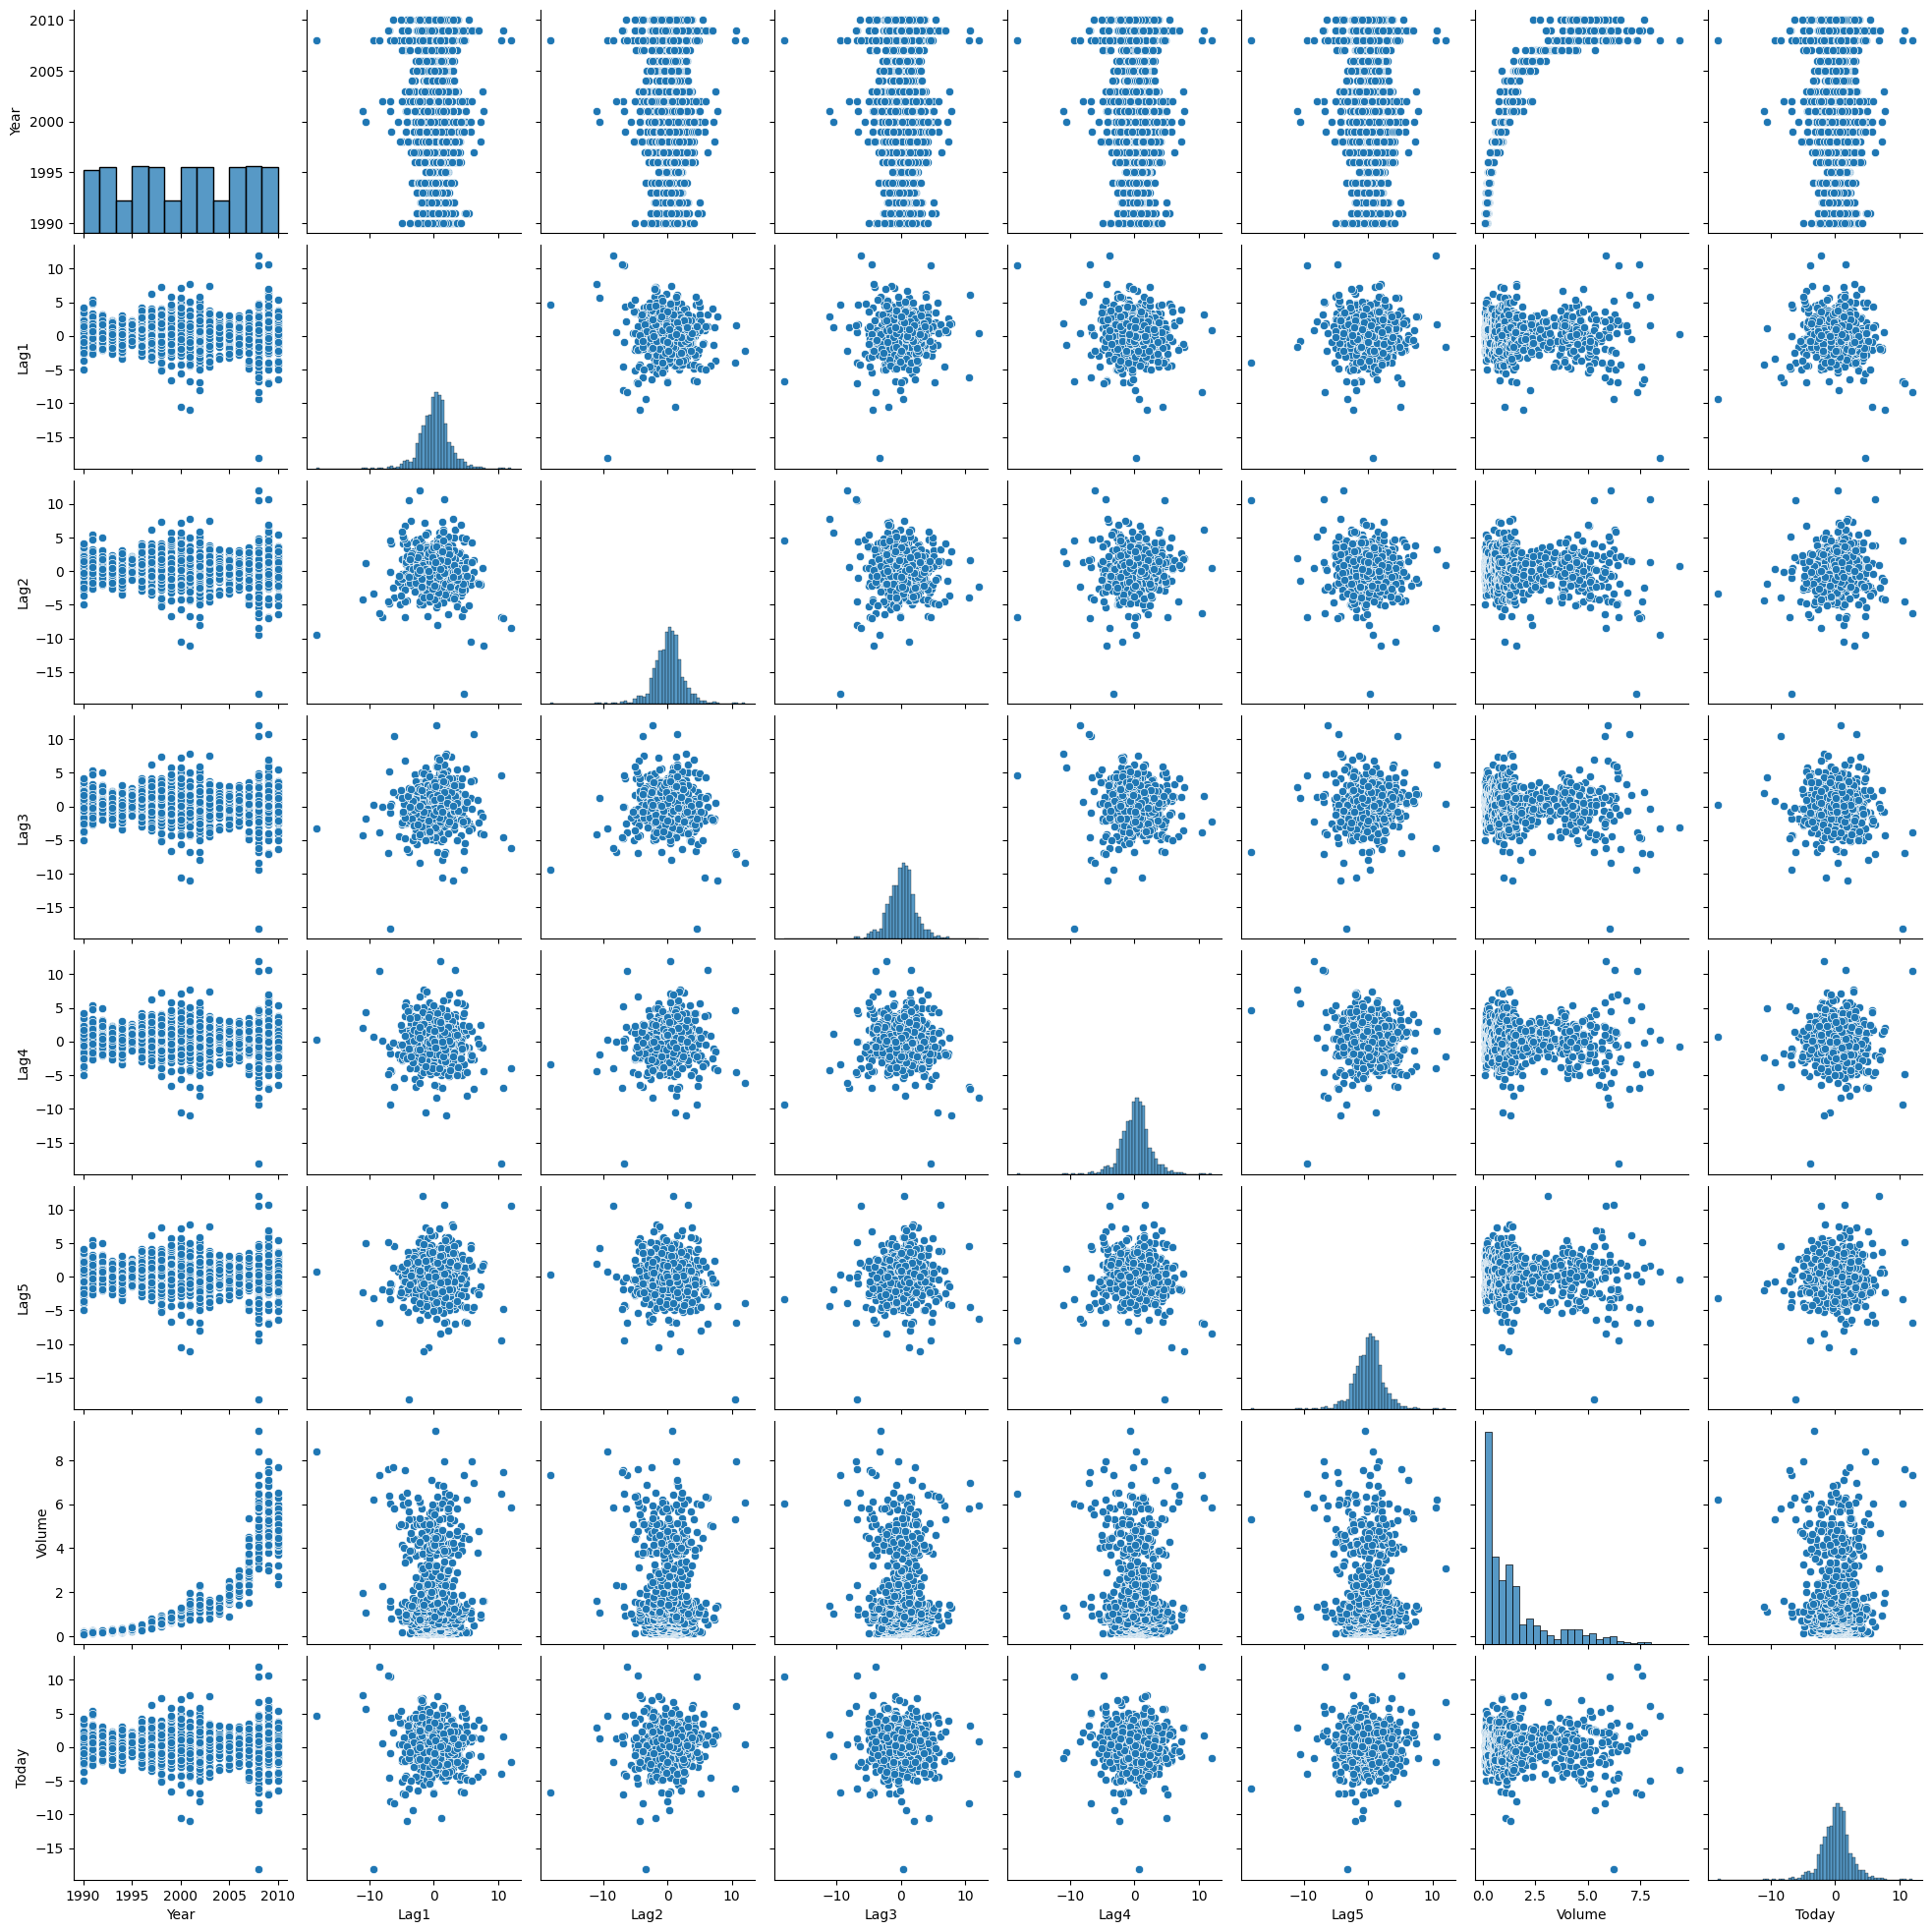

In [6]:
# generate pairs plot to check distribution of variables
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(Weekly)
plt.show()

<Axes: >

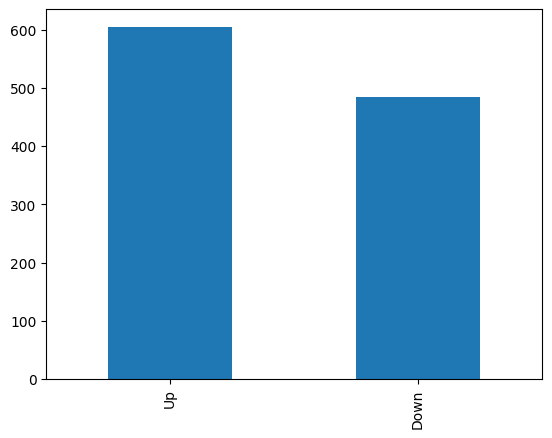

In [7]:
# plot distribution of Direction variable
Weekly['Direction'].value_counts().plot(kind='bar')

#### __(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?__

In [8]:
allvars = Weekly.columns.drop(['Today', 'Direction', 'Year'])
design = MS(allvars)
X = design.fit_transform(Weekly)
y = Weekly.Direction == 'Up'
glm = sm.GLM(y,X,family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                 1089
Model:                            GLM   Df Residuals:                     1082
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -743.18
Date:                Fri, 06 Dec 2024   Deviance:                       1486.4
Time:                        22:47:56   Pearson chi2:                 1.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):           0.009000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2669      0.086      3.106      0.0

Lag2 is the only predictor that is statistically significant

#### __(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.__

In [9]:
# predict the probability that the market will go up,
probs = results.predict()

# convert predicted probabilities into class labels, Up or Down, 
# based on predicted probability greater than or less than 0.5
labels = np.array(['Down']*1089)
labels[probs >0.5] = "Up"

# Compute the confusion matrix
confusion_table(labels , Weekly.Direction)

Truth      Down   Up
Predicted           
Down         54   48
Up          430  557

In [10]:
# Calculate overall fraction of correct predictions
(557+54)/1089, np.mean(labels == Weekly.Direction)

(0.5610651974288338, 0.5610651974288338)

The logistic regression made correct predictions 56.1% of the time. The logistic regression made incorrect predictions 43.9% of the time, of which 39.5% (430) were false positive predictions that the market was Up when it was actually Down. The other 4.4% (48) of incorrect predictions were false negative predictions that the market was Down when it was acutally Up.

#### __(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).__

In [11]:
# subset training data to Year <= 2008
train = (Weekly.Year <= 2008)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 9)

In [12]:
# fit model with Lag2 as the only predictor on training data 
model = MS(['Lag2']).fit(Weekly)
X = model.transform(Weekly)

X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train , X_train , family=sm.families.Binomial())
results = glm_train.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Direction   No. Observations:                  985
Model:                            GLM   Df Residuals:                      983
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -675.27
Date:                Fri, 06 Dec 2024   Deviance:                       1350.5
Time:                        22:47:56   Pearson chi2:                     985.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.004221
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2033      0.064      3.162      0.0

In [13]:
# predict the probability that the market will go up,
probs = results.predict(exog=X_test)

# compare the predictions to the actual 
D = Weekly.Direction
L_train , L_test = D.loc[train], D.loc[~train]

# Threshold the fitted probability at 50% for the predicted labels.
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'

# Compute the confusion matrix
confusion_table(labels , L_test)

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [14]:
# Calculate test accuracy and error rate
logistic_test_acc = np.mean(labels == L_test)
logistic_test_err = np.mean(labels != L_test)
logistic_test_acc, logistic_test_err

(0.625, 0.375)

The test accuracy is about 62.5% while the error rate is about 37.5%

In [15]:
# Calculate training accuracy and error rate
probs_train = results.predict()

labels_train = np.array(['Down']*985)
labels_train[probs_train >0.5] = 'Up'

logistic_train_acc = np.mean(labels_train == L_train)
logistic_train_err = np.mean(labels_train != L_train)

logistic_train_acc, logistic_train_err

(0.5553299492385787, 0.4446700507614213)

#### __(e) Repeat (d) using LDA.__

In [16]:
# fit LDA model on training data
lda = LDA(store_covariance=True)

X_train , X_test = [M.drop(columns=['intercept']) 
                    for M in [X_train , X_test]]
lda.fit(X_train , L_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [17]:
# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
lda_pred = lda.predict(X_test)

confusion_table(lda_pred , L_test)

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [18]:
# Calculate test accuracy and error rate
LDA_test_acc = np.mean(lda_pred == L_test)
LDA_test_err = np.mean(lda_pred != L_test)
LDA_test_acc, LDA_test_err

(0.625, 0.375)

In [19]:
# Calculate training accuracy and error rate
LDA_train_acc = np.mean(lda.predict(X_train) == L_train)
LDA_train_err = np.mean(lda.predict(X_train) != L_train)
LDA_train_acc, LDA_train_err

(0.5543147208121827, 0.44568527918781725)

#### __(f) Repeat (d) using QDA.__

In [20]:
# fit QDA model on training data
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [21]:
# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [22]:
# Calculate test accuracy and error rate
QDA_test_acc = np.mean(qda_pred == L_test)
QDA_test_err = np.mean(qda_pred != L_test)

QDA_test_acc, QDA_test_err

(0.5865384615384616, 0.41346153846153844)

In [23]:
# Calculate training accuracy and error rate
QDA_train_acc = np.mean(qda.predict(X_train) == L_train)
QDA_train_err = np.mean(qda.predict(X_train) != L_train)
QDA_train_acc, QDA_train_err

(0.5522842639593909, 0.44771573604060916)

#### __(g) Repeat (d) using KNN with K = 1.__

In [24]:
# fit KNN model on training data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , L_train)

# Compute the confusion matrix
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , L_test)

Truth      Down  Up
Predicted          
Down         22  31
Up           21  30

In [25]:
# Calculate test accuracy and error rate
KNN_test_acc = np.mean(knn1_pred == L_test)
KNN_test_err = np.mean(knn1_pred != L_test)
KNN_test_acc, KNN_test_err

(0.5, 0.5)

In [26]:
# Calculate training accuracy and error rate
knn1_pred_train = knn1.predict(X_train)

KNN_train_acc = np.mean(knn1_pred_train == L_train)
KNN_train_err = np.mean(knn1_pred_train != L_train)
KNN_train_acc, KNN_train_err

(0.9563451776649746, 0.04365482233502538)

#### __(h) Repeat (d) using naive Bayes.__

In [27]:
# fit naive Bayes model on training data
NB = GaussianNB()
NB.fit(X_train , L_train)

GaussianNB()

In [28]:
# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [29]:
# Calculate test accuracy and error rate
NB_test_acc = np.mean(nb_labels == L_test)
NB_test_err = np.mean(nb_labels != L_test)
NB_test_acc, NB_test_err

(0.5865384615384616, 0.41346153846153844)

In [30]:
# Calculate training accuracy and error rate
nb_labels_train = NB.predict(X_train)
NB_train_acc = np.mean(nb_labels_train == L_train)
NB_train_err = np.mean(nb_labels_train != L_train)
NB_train_acc, NB_train_err

(0.5522842639593909, 0.44771573604060916)

#### __(i) Which of these methods appears to provide the best results on this data?__

In [31]:
# Calculate test accuracy for all models
test_accuracy = [
    logistic_test_acc,
    LDA_test_acc,
    QDA_test_acc,
    KNN_test_acc,
    NB_test_acc,
]
test_accuracy

[0.625, 0.625, 0.5865384615384616, 0.5, 0.5865384615384616]

In [32]:
# Calculate train accuracy for all models
train_accuracy = [
    logistic_train_acc,
    LDA_train_acc,
    QDA_train_acc,
    KNN_train_acc,
    NB_train_acc,
]
train_accuracy

[0.5553299492385787,
 0.5543147208121827,
 0.5522842639593909,
 0.9563451776649746,
 0.5522842639593909]

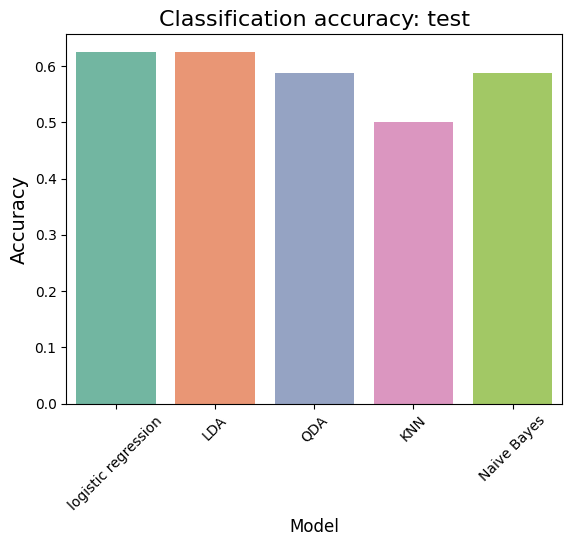

In [33]:
# Plot accuracy on test for all models
model = ['logistic regression', 'LDA', 'QDA', 'KNN', 'Naive Bayes']

p = sns.barplot(x=model, y=test_accuracy, palette='Set2')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: test', fontsize=16)
plt.show()

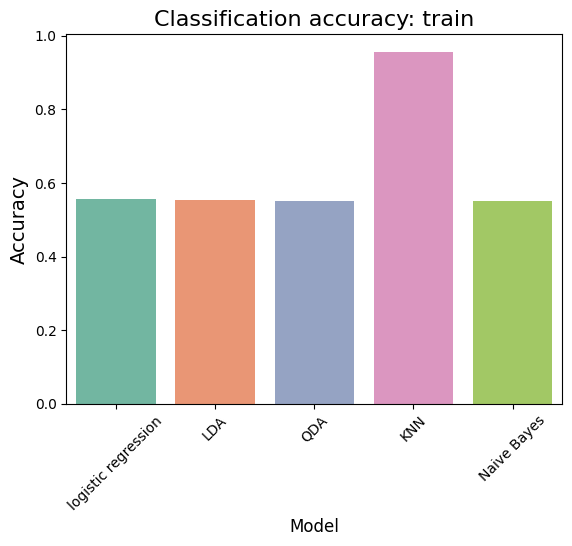

In [34]:
# Plot accuracy on training for all models
p = sns.barplot(x=model, y=train_accuracy, palette='Set2')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: train', fontsize=16)
plt.show()

The logistic regression model and the LDA model had the same accuracy on the test data (62.5%), which was the highest among all the models on the test data.  The logistic regression model and the LDA model had the same error rate on the test data (37.5%), which was the lowest among all the models on the test data. However, the logistic regression model had an accuracy of 55.5% on the training data which was slightly better than the LDA model on the training data at 55.4%.  The KNN model had the highest accuracy on the training data (95.6%) and lowest error rate on the training data (4.4%), but also had the lowest accuracy (50%) and highest error rate (50%) on the test data.  Thus, it is concluded that the logistic regression method appears to have provided the best results on this data.

#### __(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.__

##### __Experiment 1: Use the predictors Lag2 and Lag1 with an interaction term and K=1 and K=3 for KNN__
The first experiment will use the predictors Lag2 and Lag1 with an interaction term.  Value os K=1 and K=3 will be experimented with in the KNN classifier.

In [35]:
# create interaction variable between Lag1 and Lag2
Weekly['Lag1Lag2']=Weekly['Lag1']*Weekly['Lag2'] 
Weekly

Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction  \
0     1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down   
1     1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down   
2     1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up   
3     1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up   
4     1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up   
...    ...    ...    ...    ...    ...    ...       ...    ...       ...   
1084  2010 -0.861  0.043 -2.173  3.599  0.015  3.205160  2.969        Up   
1085  2010  2.969 -0.861  0.043 -2.173  3.599  4.242568  1.281        Up   
1086  2010  1.281  2.969 -0.861  0.043 -2.173  4.835082  0.283        Up   
1087  2010  0.283  1.281  2.969 -0.861  0.043  4.454044  1.034        Up   
1088  2010  1.034  0.283  1.281  2.969 -0.861  2.707105  0.069        Up   

      Lag1Lag2  
0     1.282752  
1    -0.220320  
2     0.695520  
3    -9.052064  
4     2.501968  
...        ...  
1084 -0.037023  
1085 -2.556309  
1086  3.803289  
1087  0.362523  
1088  0.292622  

[1089 rows x 10 columns]

In [36]:
# create training and test data
train = (Weekly.Year <= 2008)
Weekly_train = Weekly.loc[train]
Weekly_test = Weekly.loc[~train]
Weekly_test.shape

(104, 10)

In [37]:
# fit model with Lag1, Lag2, and Lag1Lag2 interaction as the predictors on training data 
model = MS(['Lag1','Lag2','Lag1Lag2']).fit(Weekly)
X = model.transform(Weekly)

X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train , X_train , family=sm.families.Binomial())
results = glm_train.fit()

# predict the probability 
probs = results.predict(exog=X_test)

# compare the predictions to the actual 
D = Weekly.Direction
L_train , L_test = D.loc[train], D.loc[~train]

# Threshold the fitted probability at 50% for the predicted labels.
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'

# Compute the confusion matrix
confusion_table(labels , L_test)

Truth      Down  Up
Predicted          
Down          7   8
Up           36  53

In [38]:
# Calculate test accuracy and error rate
logistic_test_acc = np.mean(labels == L_test)
logistic_test_err = np.mean(labels != L_test)
logistic_test_acc, logistic_test_err

(0.5769230769230769, 0.4230769230769231)

In [39]:
# fit LDA model on training data
lda = LDA(store_covariance=True)
X_train , X_test = [M.drop(columns=['intercept']) 
                    for M in [X_train , X_test]]
lda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
lda_pred = lda.predict(X_test)

confusion_table(lda_pred , L_test)

Truth      Down  Up
Predicted          
Down          7   8
Up           36  53

In [40]:
# Calculate test accuracy and error rate
LDA_test_acc = np.mean(lda_pred == L_test)
LDA_test_err = np.mean(lda_pred != L_test)
LDA_test_acc, LDA_test_err

(0.5769230769230769, 0.4230769230769231)

In [41]:
# fit QDA model on training data
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth      Down  Up
Predicted          
Down         23  36
Up           20  25

In [42]:
# Calculate test accuracy and error rate
QDA_test_acc = np.mean(qda_pred == L_test)
QDA_test_err = np.mean(qda_pred != L_test)

QDA_test_acc, QDA_test_err

(0.46153846153846156, 0.5384615384615384)

In [43]:
# fit naive Bayes model on training data
NB = GaussianNB()
NB.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth      Down  Up
Predicted          
Down         17  29
Up           26  32

In [44]:
# Calculate test accuracy and error rate
NB_test_acc = np.mean(nb_labels == L_test)
NB_test_err = np.mean(nb_labels != L_test)
NB_test_acc, NB_test_err

(0.47115384615384615, 0.5288461538461539)

In [45]:
# fit KNN model with K=1 on training data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , L_train)

# Compute the confusion matrix
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , L_test)

Truth      Down  Up
Predicted          
Down         18  25
Up           25  36

In [46]:
# Calculate test accuracy and error rate
KNN1_test_acc = np.mean(knn1_pred == L_test)
KNN1_test_err = np.mean(knn1_pred != L_test)
KNN1_test_acc, KNN1_test_err

(0.5192307692307693, 0.4807692307692308)

In [47]:
# fit KNN model with K=3 on training data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train , L_train)

# Compute the confusion matrix
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred , L_test)

Truth      Down  Up
Predicted          
Down         23  33
Up           20  28

In [48]:
# Calculate test accuracy and error rate
KNN3_test_acc = np.mean(knn3_pred == L_test)
KNN3_test_err = np.mean(knn3_pred != L_test)
KNN3_test_acc, KNN3_test_err

(0.49038461538461536, 0.5096153846153846)

In [49]:
# Calculate test accuracy for all models
test_accuracy = [
    logistic_test_acc,
    LDA_test_acc,
    QDA_test_acc,
    NB_test_acc,
    KNN1_test_acc,
    KNN3_test_acc,
]
test_accuracy

[0.5769230769230769,
 0.5769230769230769,
 0.46153846153846156,
 0.47115384615384615,
 0.5192307692307693,
 0.49038461538461536]

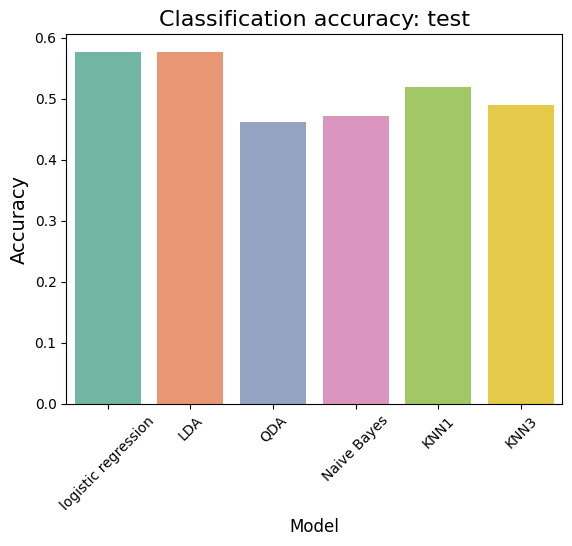

In [50]:
# Plot accuracy on test for all models
model = ['logistic regression', 'LDA', 'QDA', 'Naive Bayes', 'KNN1', 'KNN3' ]

p = sns.barplot(x=model, y=test_accuracy, palette='Set2')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: test', fontsize=16)
plt.show()

##### __Experiment 2: Use all predictors scaled with Volume log-transformed and K=1 and K=3 for KNN__
The second experiment will use all of the predictors scaled. The predictor Volume will be Box-Cox transformed since the distribution of Volume is highly skewed.  Value os K=1 and K=3 will be experimented with in the KNN classifier.

In [51]:
# Box-Cox transform the Volume column
from scipy import stats
Weekly['Volume_trans'], lambda_value  =stats.boxcox(Weekly['Volume'])

In [52]:
# use StandardScaler() to standardize the data
Year = Weekly.Year
Direction = Weekly.Direction

feature_df = Weekly.drop(columns=['Year','Today','Direction','Lag1Lag2'])

scaler = StandardScaler(with_mean=True , with_std=True , copy=True)

scaler.fit(feature_df)
X_std = scaler.transform(feature_df)

feature_std = pd.DataFrame( X_std , columns=feature_df.columns, index=feature_df.index)
feature_std['Year']=Year
feature_std['Direction']=Direction
feature_std

Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
0     0.282443  0.603063 -1.730598 -0.158875 -1.535417 -0.842087   
1    -0.178522  0.282204  0.603876 -1.730174 -0.156297 -0.845884   
2    -1.157328 -0.178713  0.283458  0.604521 -1.726927 -0.839203   
3     1.427638 -1.157419 -0.176825  0.284072  0.606774 -0.838140   
4     0.238299  1.427282 -1.154185 -0.176254  0.286462 -0.842827   
...        ...       ...       ...       ...       ...       ...   
1084 -0.429378 -0.045871 -0.983380  1.463712 -0.052916  0.967186   
1085  1.196307 -0.429544 -0.044165 -0.982885  1.465599  1.582544   
1086  0.479817  1.195974 -0.427311 -0.043582 -0.979956  1.934004   
1087  0.056205  0.479558  1.195971 -0.426763 -0.041053  1.707985   
1088  0.374975  0.055990  0.480540  1.196672 -0.424071  0.671756   

      Volume_trans  Year Direction  
0        -1.619118  1990      Down  
1        -1.659324  1990      Down  
2        -1.589710  1990        Up  
3        -1.579098  1990        Up  
4        -1.626820  1990        Up  
...            ...   ...       ...  
1084      1.151475  2010        Up  
1085      1.396675  2010        Up  
1086      1.510358  2010        Up  
1087      1.439023  2010        Up  
1088      1.002900  2010        Up  

[1089 rows x 9 columns]

In [53]:
# create training and test data
train = (feature_std.Year <= 2008)
Weekly_train = feature_std.loc[train]
Weekly_test = feature_std.loc[~train]
Weekly_test.shape

(104, 9)

In [54]:
# fit model with Lag1, Lag2, Lag3, Lag4, Lag5, and Volume_trans as the predictors on training data 
model = MS(['Lag1','Lag2','Lag3','Lag4','Lag5','Volume_trans']).fit(feature_std)
X = model.transform(feature_std)
y = feature_std.Direction == 'Up'
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train , X_train , family=sm.families.Binomial())
results = glm_train.fit()

# predict the probability 
probs = results.predict(exog=X_test)

# compare the predictions to the actual 
D = feature_std.Direction
L_train , L_test = D.loc[train], D.loc[~train]

# Threshold the fitted probability at 50% for the predicted labels.
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'

# Compute the confusion matrix
confusion_table(labels , L_test)

Truth      Down  Up
Predicted          
Down         23  30
Up           20  31

In [55]:
# Calculate test accuracy and error rate
logistic_test_acc = np.mean(labels == L_test)
logistic_test_err = np.mean(labels != L_test)
logistic_test_acc, logistic_test_err

(0.5192307692307693, 0.4807692307692308)

In [56]:
# fit LDA model on training data
lda = LDA(store_covariance=True)
X_train , X_test = [M.drop(columns=['intercept']) 
                    for M in [X_train , X_test]]
lda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
lda_pred = lda.predict(X_test)

confusion_table(lda_pred , L_test)

Truth      Down  Up
Predicted          
Down         22  30
Up           21  31

In [57]:
# Calculate test accuracy and error rate
LDA_test_acc = np.mean(lda_pred == L_test)
LDA_test_err = np.mean(lda_pred != L_test)
LDA_test_acc, LDA_test_err

(0.5096153846153846, 0.49038461538461536)

In [58]:
# fit QDA model on training data
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth      Down  Up
Predicted          
Down         18  25
Up           25  36

In [59]:
# Calculate test accuracy and error rate
QDA_test_acc = np.mean(qda_pred == L_test)
QDA_test_err = np.mean(qda_pred != L_test)

QDA_test_acc, QDA_test_err

(0.5192307692307693, 0.4807692307692308)

In [60]:
# fit naive Bayes model on training data
NB = GaussianNB()
NB.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth      Down  Up
Predicted          
Down         18  34
Up           25  27

In [61]:
# Calculate test accuracy and error rate
NB_test_acc = np.mean(nb_labels == L_test)
NB_test_err = np.mean(nb_labels != L_test)
NB_test_acc, NB_test_err

(0.4326923076923077, 0.5673076923076923)

In [62]:
# fit KNN model with K=1 on training data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , L_train)

# Compute the confusion matrix
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , L_test)

Truth      Down  Up
Predicted          
Down         23  29
Up           20  32

In [63]:
# Calculate test accuracy and error rate
KNN1_test_acc = np.mean(knn1_pred == L_test)
KNN1_test_err = np.mean(knn1_pred != L_test)
KNN1_test_acc, KNN1_test_err

(0.5288461538461539, 0.47115384615384615)

In [64]:
# fit KNN model with K=3 on training data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train , L_train)

# Compute the confusion matrix
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred , L_test)

Truth      Down  Up
Predicted          
Down         22  27
Up           21  34

In [65]:
# Calculate test accuracy and error rate
KNN3_test_acc = np.mean(knn3_pred == L_test)
KNN3_test_err = np.mean(knn3_pred != L_test)
KNN3_test_acc, KNN3_test_err

(0.5384615384615384, 0.46153846153846156)

In [66]:
# Calculate test accuracy for all models
test_accuracy = [
    logistic_test_acc,
    LDA_test_acc,
    QDA_test_acc,
    NB_test_acc,
    KNN1_test_acc,
    KNN3_test_acc,
]
test_accuracy

[0.5192307692307693,
 0.5096153846153846,
 0.5192307692307693,
 0.4326923076923077,
 0.5288461538461539,
 0.5384615384615384]

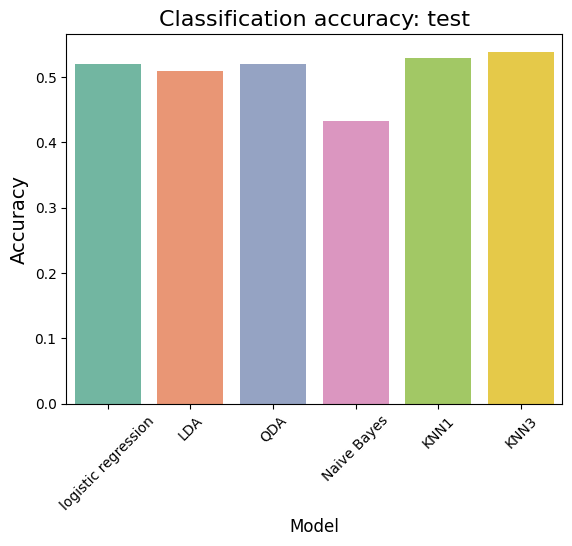

In [67]:
# Plot accuracy on test for all models
model = ['logistic regression', 'LDA', 'QDA', 'Naive Bayes', 'KNN1', 'KNN3' ]

p = sns.barplot(x=model, y=test_accuracy, palette='Set2')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: test', fontsize=16)
plt.show()


##### __Experiment 3: Use scaled Lag2 as the only predictor and K=1 and K=3 for KNN__

In [68]:
# fit model with scaled Lag2 as the predictor on training data 
model = MS(['Lag2']).fit(feature_std)
X = model.transform(feature_std)
y = feature_std.Direction == 'Up'
X_train , X_test = X.loc[train], X.loc[~train]
y_train , y_test = y.loc[train], y.loc[~train]
glm_train = sm.GLM(y_train , X_train , family=sm.families.Binomial())
results = glm_train.fit()

# predict the probability 
probs = results.predict(exog=X_test)

# compare the predictions to the actual 
D = feature_std.Direction
L_train , L_test = D.loc[train], D.loc[~train]

# Threshold the fitted probability at 50% for the predicted labels.
labels = np.array(['Down']*104)
labels[probs >0.5] = 'Up'

# Compute the confusion matrix
confusion_table(labels , L_test)

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [69]:
# Calculate test accuracy and error rate
logistic_test_acc = np.mean(labels == L_test)
logistic_test_err = np.mean(labels != L_test)
logistic_test_acc, logistic_test_err

(0.625, 0.375)

In [70]:
# fit LDA model on training data
lda = LDA(store_covariance=True)
X_train , X_test = [M.drop(columns=['intercept']) 
                    for M in [X_train , X_test]]
lda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
lda_pred = lda.predict(X_test)

confusion_table(lda_pred , L_test)

Truth      Down  Up
Predicted          
Down          9   5
Up           34  56

In [71]:
# Calculate test accuracy and error rate
LDA_test_acc = np.mean(lda_pred == L_test)
LDA_test_err = np.mean(lda_pred != L_test)
LDA_test_acc, LDA_test_err


(0.625, 0.375)

In [72]:
# fit QDA model on training data
qda = QDA(store_covariance=True)
qda.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
qda_pred = qda.predict(X_test)
confusion_table(qda_pred , L_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [73]:
# Calculate test accuracy and error rate
QDA_test_acc = np.mean(qda_pred == L_test)
QDA_test_err = np.mean(qda_pred != L_test)

QDA_test_acc, QDA_test_err


(0.5865384615384616, 0.41346153846153844)

In [74]:
# fit naive Bayes model on training data
NB = GaussianNB()
NB.fit(X_train , L_train)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
nb_labels = NB.predict(X_test)
confusion_table(nb_labels , L_test)

Truth      Down  Up
Predicted          
Down          0   0
Up           43  61

In [75]:
# Calculate test accuracy and error rate
NB_test_acc = np.mean(nb_labels == L_test)
NB_test_err = np.mean(nb_labels != L_test)
NB_test_acc, NB_test_err


(0.5865384615384616, 0.41346153846153844)

In [76]:
# fit KNN model with K=1 on training data
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train , L_train)

# Compute the confusion matrix
knn1_pred = knn1.predict(X_test)
confusion_table(knn1_pred , L_test)


Truth      Down  Up
Predicted          
Down         22  31
Up           21  30

In [77]:
# Calculate test accuracy and error rate
KNN1_test_acc = np.mean(knn1_pred == L_test)
KNN1_test_err = np.mean(knn1_pred != L_test)
KNN1_test_acc, KNN1_test_err

(0.5, 0.5)

In [78]:
# fit KNN model with K=3 on training data
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train , L_train)

# Compute the confusion matrix
knn3_pred = knn3.predict(X_test)
confusion_table(knn3_pred , L_test)

Truth      Down  Up
Predicted          
Down         16  20
Up           27  41

In [79]:
# Calculate test accuracy and error rate
KNN3_test_acc = np.mean(knn3_pred == L_test)
KNN3_test_err = np.mean(knn3_pred != L_test)
KNN3_test_acc, KNN3_test_err

(0.5480769230769231, 0.4519230769230769)

In [80]:
# Calculate test accuracy for all models
test_accuracy = [
    logistic_test_acc,
    LDA_test_acc,
    QDA_test_acc,
    NB_test_acc,
    KNN1_test_acc,
    KNN3_test_acc,
]
test_accuracy

[0.625, 0.625, 0.5865384615384616, 0.5865384615384616, 0.5, 0.5480769230769231]

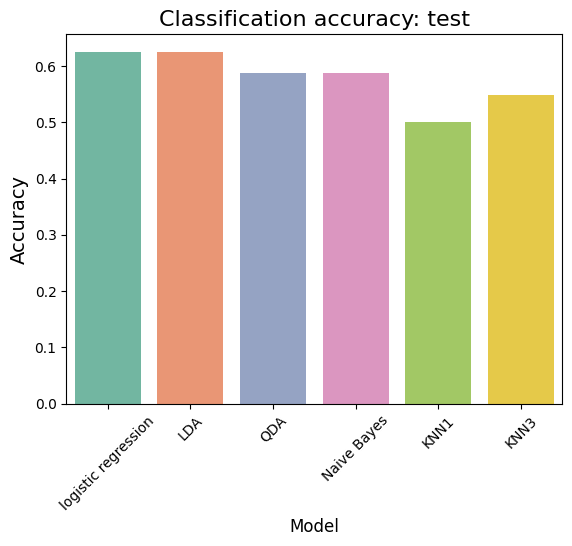

In [81]:
# Plot accuracy on test for all models
model = ['logistic regression', 'LDA', 'QDA', 'Naive Bayes', 'KNN1', 'KNN3' ]

p = sns.barplot(x=model, y=test_accuracy, palette='Set2')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: test', fontsize=16)
plt.show()

Using the standardized Lag2 variable produced the same results as the Lag2 variable before standardization on all models.

### __3. Compete in the Multi-class Prediction of Obesity Risk competition (late submission) on Kaggle.com__
https://www.kaggle.com/competitions/playground-series-s4e2/overview

Build four models:  one multinomial logistic regression model, one linear or quadratic discriminant analysis model, one naïve Bayes model, and one Support Vector Machine. 

Interpret your classification models, investigate assumptions, and interpret all findings.

#### __EDA and Preprocessing__

In [82]:
# import training data
ObeseTrain = pd.read_csv(r'./train.csv',index_col=0)
ObeseTrain

Gender        Age    Height      Weight family_history_with_overweight  \
id                                                                              
0        Male  24.443011  1.699998   81.669950                            yes   
1      Female  18.000000  1.560000   57.000000                            yes   
2      Female  18.000000  1.711460   50.165754                            yes   
3      Female  20.952737  1.710730  131.274851                            yes   
4        Male  31.641081  1.914186   93.798055                            yes   
...       ...        ...       ...         ...                            ...   
20753    Male  25.137087  1.766626  114.187096                            yes   
20754    Male  18.000000  1.710000   50.000000                             no   
20755    Male  20.101026  1.819557  105.580491                            yes   
20756    Male  33.852953  1.700000   83.520113                            yes   
20757    Male  26.680376  1.816547  118.134898                            yes   

      FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
id                                                                         
0      yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1      yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2      yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3      yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4      yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   
...    ...       ...       ...         ...   ...       ...  ..       ...   
20753  yes  2.919584  3.000000   Sometimes    no  2.151809  no  1.330519   
20754  yes  3.000000  4.000000  Frequently    no  1.000000  no  2.000000   
20755  yes  2.407817  3.000000   Sometimes    no  2.000000  no  1.158040   
20756  yes  2.671238  1.971472   Sometimes    no  2.144838  no  0.000000   
20757  yes  3.000000  3.000000   Sometimes    no  2.003563  no  0.684487   

            TUE       CALC                 MTRANS           NObeyesdad  
id                                                                      
0      0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1      1.000000         no             Automobile        Normal_Weight  
2      1.673584         no  Public_Transportation  Insufficient_Weight  
3      0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4      0.931721  Sometimes  Public_Transportation  Overweight_Level_II  
...         ...        ...                    ...                  ...  
20753  0.196680  Sometimes  Public_Transportation      Obesity_Type_II  
20754  1.000000  Sometimes  Public_Transportation  Insufficient_Weight  
20755  1.198439         no  Public_Transportation      Obesity_Type_II  
20756  0.973834         no             Automobile  Overweight_Level_II  
20757  0.713823  Sometimes  Public_Transportation      Obesity_Type_II  

[20758 rows x 17 columns]

In [83]:
# check data types of columns
ObeseTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [84]:
# rename the variable family_history_with_overweight to shorter FHWO
ObeseTrain.rename(columns={"family_history_with_overweight":"FHWO"},inplace=True)
ObeseTrain.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'FHWO', 'FAVC', 'FCVC', 'NCP',
       'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'NObeyesdad'],
      dtype='object')

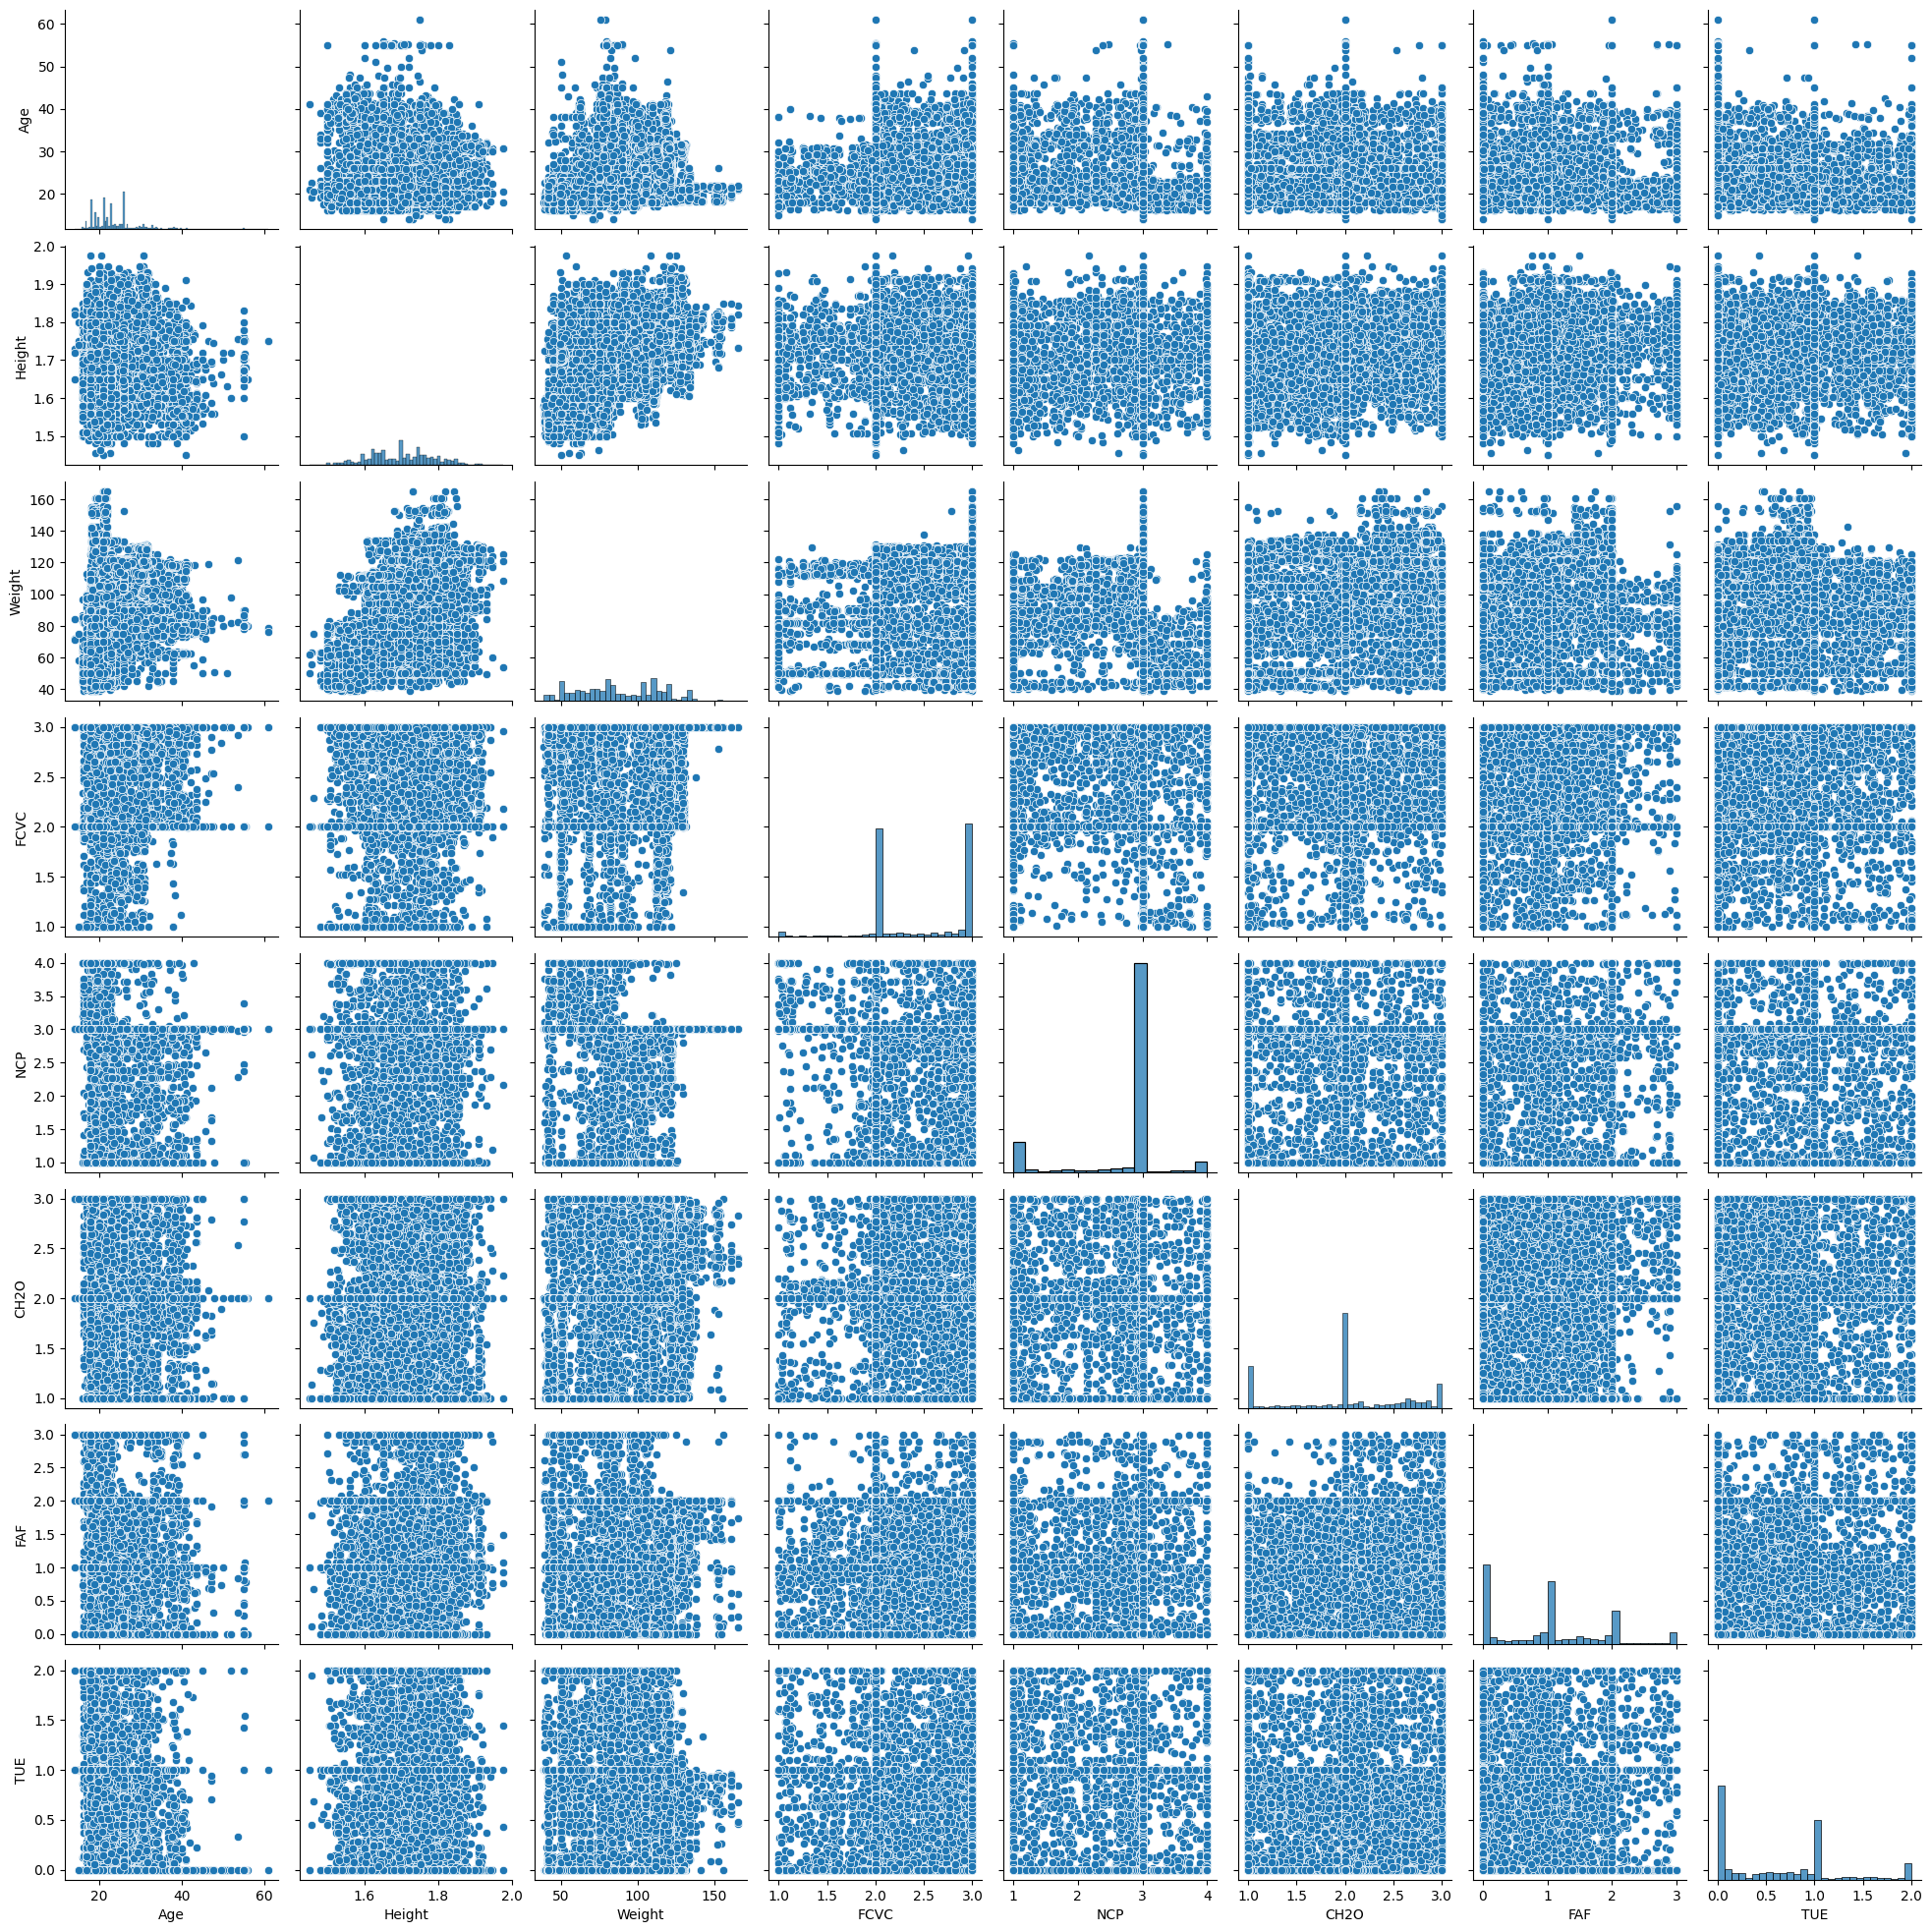

In [85]:
# generate pairs plot to check distribution of quantitative variables 
sns.pairplot(ObeseTrain)
plt.show()

In [86]:
# look at correlation between quantitative variables
correlation_matrix = ObeseTrain.corr()
print(correlation_matrix)

             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.011713  0.283381  0.034414 -0.048479 -0.016325 -0.192259   
Height -0.011713  1.000000  0.416677 -0.071546  0.191383  0.183706  0.295278   
Weight  0.283381  0.416677  1.000000  0.245682  0.095947  0.317914 -0.084845   
FCVC    0.034414 -0.071546  0.245682  1.000000  0.113349  0.101299 -0.089822   
NCP    -0.048479  0.191383  0.095947  0.113349  1.000000  0.080949  0.100871   
CH2O   -0.016325  0.183706  0.317914  0.101299  0.080949  1.000000  0.082932   
FAF    -0.192259  0.295278 -0.084845 -0.089822  0.100871  0.082932  1.000000   
TUE    -0.296154  0.076433 -0.086471 -0.147843  0.067459 -0.010654  0.021213   

             TUE  
Age    -0.296154  
Height  0.076433  
Weight -0.086471  
FCVC   -0.147843  
NCP     0.067459  
CH2O   -0.010654  
FAF     0.021213  
TUE     1.000000  


In [87]:
# Generate descriptive statistics
ObeseTrain.describe()

Age        Height        Weight          FCVC           NCP  \
count  20758.000000  20758.000000  20758.000000  20758.000000  20758.000000   
mean      23.841804      1.700245     87.887768      2.445908      2.761332   
std        5.688072      0.087312     26.379443      0.533218      0.705375   
min       14.000000      1.450000     39.000000      1.000000      1.000000   
25%       20.000000      1.631856     66.000000      2.000000      3.000000   
50%       22.815416      1.700000     84.064875      2.393837      3.000000   
75%       26.000000      1.762887    111.600553      3.000000      3.000000   
max       61.000000      1.975663    165.057269      3.000000      4.000000   

               CH2O           FAF           TUE  
count  20758.000000  20758.000000  20758.000000  
mean       2.029418      0.981747      0.616756  
std        0.608467      0.838302      0.602113  
min        1.000000      0.000000      0.000000  
25%        1.792022      0.008013      0.000000  
50%        2.000000      1.000000      0.573887  
75%        2.549617      1.587406      1.000000  
max        3.000000      3.000000      2.000000

In [88]:
# check distribution of Gender
ObeseTrain.Gender.value_counts(dropna=False)

Female    10422
Male      10336
Name: Gender, dtype: int64

In [89]:
# check distribution of FHWO
ObeseTrain.FHWO.value_counts(dropna=False)

yes    17014
no      3744
Name: FHWO, dtype: int64

In [90]:
# check distribution of FAVC
ObeseTrain.FAVC.value_counts(dropna=False)

yes    18982
no      1776
Name: FAVC, dtype: int64

In [91]:
# check distribution of CAEC
ObeseTrain.CAEC.value_counts(dropna=False)

Sometimes     17529
Frequently     2472
Always          478
no              279
Name: CAEC, dtype: int64

In [92]:
# check distribution of SMOKE
ObeseTrain.SMOKE.value_counts(dropna=False)

no     20513
yes      245
Name: SMOKE, dtype: int64

In [93]:
# check distribution of SCC
ObeseTrain.SCC.value_counts(dropna=False)

no     20071
yes      687
Name: SCC, dtype: int64

In [94]:
# check distribution of CALC 
ObeseTrain.CALC.value_counts(dropna=False)

Sometimes     15066
no             5163
Frequently      529
Name: CALC, dtype: int64

In [95]:
# check distribution of MTRANS
ObeseTrain.MTRANS.value_counts(dropna=False)

Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: MTRANS, dtype: int64

In [96]:
# check distribution of NObeyesdad
ObeseTrain.NObeyesdad.value_counts(dropna=False)

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [97]:
# check for missing values
print(ObeseTrain.isnull().sum())

Gender        0
Age           0
Height        0
Weight        0
FHWO          0
FAVC          0
FCVC          0
NCP           0
CAEC          0
SMOKE         0
CH2O          0
SCC           0
FAF           0
TUE           0
CALC          0
MTRANS        0
NObeyesdad    0
dtype: int64


#### __Feature Engineering__
Dummy variables need to be created for the categorical variables. The variables Gender, FHWO, FAVC,  SMOKE, and SCC each have 2 levels, so only 1 dummy is needed for each variable.  CALC has 3 levels, so 2 dummies are needed, CAEC has 4 levels, so 3 dummies are needed, and MTRANS has 5 levels so 4 dummies are needed.

The quantitative variables need to be standardized before modeling.

The dependent variable NObeyesdad will be coded with one category as the referent category as follows:
* Insufficient_Weight = 0
* Normal_Weight = 1
* Overweight_Level_I = 2
* Overweight_Level_II = 3
* Obesity_Type_I = 4
* Obesity_Type_II = 5
* Obesity_Type_III = 6

In [98]:
# Generate dummy variables for qualitative variables
quaLVars = ObeseTrain[['Gender','FHWO','FAVC','SMOKE','SCC','CALC','CAEC','MTRANS']]
quaLVars = pd.get_dummies(quaLVars)
quaLVars.columns

Index(['Gender_Female', 'Gender_Male', 'FHWO_no', 'FHWO_yes', 'FAVC_no',
       'FAVC_yes', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [99]:
# standardize the quantitative variables
quantVars = ObeseTrain[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

scaler = StandardScaler(with_mean=True , with_std=True , copy=True)
scaler.fit(quantVars)

X_std = scaler.transform(quantVars)

quantVars_std = pd.DataFrame( X_std , columns=quantVars.columns, index = quantVars.index)
quantVars_std.std()

Age       1.000024
Height    1.000024
Weight    1.000024
FCVC      1.000024
NCP       1.000024
CH2O      1.000024
FAF       1.000024
TUE       1.000024
dtype: float64

In [100]:
# Code the dependent variable NObeyesdad with a category as the referent
NObeyesdad_mapping = {'Insufficient_Weight':0,
                      'Normal_Weight':1,
                      'Overweight_Level_I':2,
                      'Overweight_Level_II':3,
                      'Obesity_Type_I':4,
                      'Obesity_Type_II':5,
                      'Obesity_Type_III':6
                     }

ObeseTrain = ObeseTrain.assign(y = ObeseTrain.NObeyesdad.map(NObeyesdad_mapping))

In [101]:
# combine the standardized quantitative variables and the dummy qualitative variables to make the X data frame
X = pd.concat([quantVars_std, quaLVars], axis=1)

# drop the unneeded dummy variables 
X = X.drop(columns=['Gender_Female','FHWO_yes','FAVC_yes','SMOKE_yes','SCC_yes','CALC_Frequently','CAEC_Frequently','MTRANS_Public_Transportation'])
X

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
id                                                                            
0      0.105699 -0.002828 -0.235713 -0.836279  0.314684  1.206594 -1.171141   
1     -1.027052 -1.606291 -1.170931 -0.836279  0.338364 -0.048349  0.021775   
2     -1.027052  0.128451 -1.430012 -1.060332 -1.913423 -0.195644 -0.138022   
3     -0.507929  0.120090  1.644770  1.039171  0.338364 -0.584035  0.579896   
4      1.371197  2.450367  0.224054  0.438397 -1.119801 -0.081469  1.176486   
...         ...       ...       ...       ...       ...       ...       ...   
20753  0.227725  0.760293  0.996987  0.888355  0.338364  0.201151  0.416056   
20754 -1.027052  0.111729 -1.436296  1.039171  1.756085 -1.691863  1.214691   
20755 -0.657669  1.366537  0.670717 -0.071439  0.338364 -0.048349  0.210303   
20756  1.760067 -0.002805 -0.165574  0.422594 -1.119801  0.189694 -1.171141   
20757  0.499051  1.332062  1.146645  1.039171  0.338364 -0.042493 -0.354606   

            TUE  Gender_Male  FHWO_no  ...  SCC_no  CALC_Sometimes  CALC_no  \
id                                     ...                                    
0      0.597438            1        0  ...       1               1        0   
1      0.636513            0        0  ...       1               0        1   
2      1.755239            0        0  ...       1               0        1   
3      0.271455            0        0  ...       1               1        0   
4      0.523111            1        0  ...       1               1        0   
...         ...          ...      ...  ...     ...             ...      ...   
20753 -0.697686            1        0  ...       1               1        0   
20754  0.636513            1        1  ...       1               1        0   
20755  0.966092            1        0  ...       1               0        1   
20756  0.593055            1        0  ...       1               0        1   
20757  0.161214            1        0  ...       1               1        0   

       CAEC_Always  CAEC_Sometimes  CAEC_no  MTRANS_Automobile  MTRANS_Bike  \
id                                                                            
0                0               1        0                  0            0   
1                0               0        0                  1            0   
2                0               1        0                  0            0   
3                0               1        0                  0            0   
4                0               1        0                  0            0   
...            ...             ...      ...                ...          ...   
20753            0               1        0                  0            0   
20754            0               0        0                  0            0   
20755            0               1        0                  0            0   
20756            0               1        0                  1            0   
20757            0               1        0                  0            0   

       MTRANS_Motorbike  MTRANS_Walking  
id                                       
0                     0               0  
1                     0               0  
2                     0               0  
3                     0               0  
4                     0               0  
...                 ...             ...  
20753                 0               0  
20754                 0               0  
20755                 0               0  
20756                 0               0  
20757                 0               0  

[20758 rows x 22 columns]

In [102]:
# create the y data frame from the recoded values of NObeyesdad
y = ObeseTrain.y
y

id
0        3
1        1
2        0
3        6
4        3
        ..
20753    5
20754    0
20755    5
20756    3
20757    5
Name: y, Length: 20758, dtype: int64

#### __Multinomial logistic regression model__
Multinomial logistic regression with cross-validation

In [103]:
LRmodel = lr(multi_class='multinomial', solver='lbfgs') 

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate the model and collect the scores 
n_scores = cross_val_score(LRmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report the model performance 
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 

Mean Accuracy: 0.863 (0.006)


In [104]:
LR1 = LRmodel.fit(X,y) 
#print(LR1.coef_, LR1.score(X,y)) 
LR1pred=LR1.predict(X) 
print(cr(y,LR1pred)) 

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2523
           1       0.86      0.81      0.84      3082
           2       0.74      0.70      0.72      2427
           3       0.72      0.71      0.72      2522
           4       0.82      0.83      0.83      2910
           5       0.94      0.96      0.95      3248
           6       0.99      1.00      1.00      4046

    accuracy                           0.87     20758
   macro avg       0.85      0.85      0.85     20758
weighted avg       0.86      0.87      0.86     20758



In [105]:
print('Coefficients:',"\n",LR1.coef_)
print('Intercepts:',"\n",LR1.intercept_)
print('Classes:',"\n",LR1.classes_)

Coefficients: 
 [[-8.78697324e-01  3.78325336e+00 -2.15176966e+01 -3.73194980e-01
   2.37638459e-01  8.03758913e-02  2.78014884e-01  2.21626454e-01
   1.47368497e+00  1.31046934e+00  1.23014613e-01 -8.28297233e-01
  -2.01225521e-01  1.97471916e-01  7.60158310e-01 -1.29089294e+00
  -1.34614202e+00 -1.63246705e+00  1.67527841e+00 -6.86491268e-01
  -2.84932539e-01 -3.50128276e-01]
 [-3.96099922e-01  2.03319350e+00 -1.15038251e+01 -5.50733107e-01
   1.62876275e-01 -4.94956212e-02  2.80173710e-01 -4.94983820e-02
   1.34040738e+00  1.05507598e+00  1.81948124e-01 -6.40195787e-01
  -1.91275703e-01  4.38888170e-02  4.61551145e-01  8.51584155e-01
  -4.91122211e-01 -4.62706866e-01  5.79295829e-01  5.83652915e-01
   1.04704280e+00  2.58122936e-01]
 [-1.79119599e-01  7.24679052e-01 -3.88440229e+00 -7.90907837e-01
  -1.65633898e-01  2.77285516e-01  1.60686702e-01 -9.46135292e-02
   3.79465822e-01  1.04627955e+00 -2.21296338e-01 -3.55287210e-02
  -1.39986343e+00 -2.18298577e-01 -7.93123019e-01  1.987

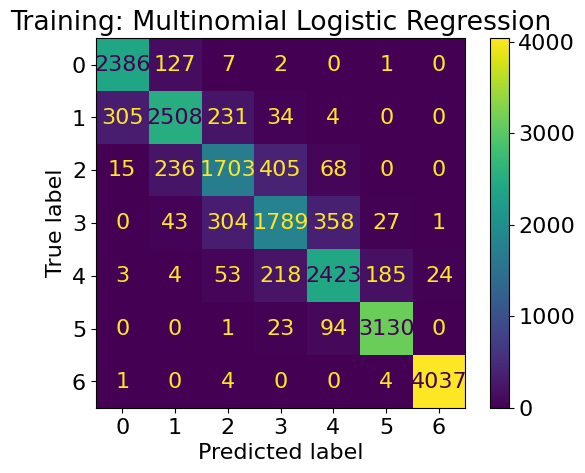

In [106]:
# Confusion matrix
cmTrain = confusion_matrix(y,LR1pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=LR1.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: Multinomial Logistic Regression')
plt.show()

#### __LDA model__

In [107]:
# fit LDA model on training data
LDAmodel = LDA(store_covariance=True)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 
n_scores = cross_val_score(LDAmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report the model performance 
print('Mean Accuracy QDA: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 

Mean Accuracy QDA: 0.821 (0.006)


In [108]:
LDAmodel.fit(X , y)

# Compute the confusion matrix and the overall fraction of correct predictions for the held out data
lda_pred = LDAmodel.predict(X)

# Calculate test accuracy and error rate
LDA_test_acc = np.mean(lda_pred == y)
LDA_test_err = np.mean(lda_pred != y)

LDA_test_acc, LDA_test_err

(0.8221890355525581, 0.17781096444744196)

In [109]:
print('Coefficients:',"\n",LDAmodel.coef_)
print('Intercepts:',"\n",LDAmodel.intercept_)
print('Classes:',"\n",LDAmodel.classes_)

Coefficients: 
 [[-2.36603239e+00  5.43311263e+00 -2.26909968e+01  2.18831525e-01
   2.89038535e-01  1.21484124e-01  1.19509040e+00  4.69703750e-01
   2.00358618e-01  3.37363552e+00  2.09460745e-01 -1.36453462e+00
  -2.18646818e-01  3.12121031e+00  2.70386715e+00 -4.43217868e+00
  -4.61434778e+00 -6.10356590e+00  4.18849029e+00  2.33082264e-01
   2.46247836e+00 -1.55699648e+00]
 [-1.59959741e+00  2.92885991e+00 -1.48132444e+01 -1.05955567e-01
   2.83733485e-01 -2.31711028e-02  9.38349588e-01  4.82292413e-02
   1.11269955e+00  1.86341530e+00  5.23358242e-01 -1.76341287e+00
   5.19322946e-01  1.25573160e+00  1.11186169e+00  1.53857724e+00
  -1.52544842e+00 -2.61270224e+00  2.36940053e+00  1.99795060e+00
   3.48483861e+00  3.39484222e-01]
 [-6.57030159e-01  1.53317215e+00 -7.94834152e+00 -4.55166413e-01
  -3.70151947e-01  2.48317221e-01  6.10982285e-01 -4.35896881e-03
   1.15535926e+00  6.32692377e-01 -9.47297513e-02 -6.60551735e-01
  -2.13867753e+00 -5.79418842e-01 -1.59836931e+00 -9.682

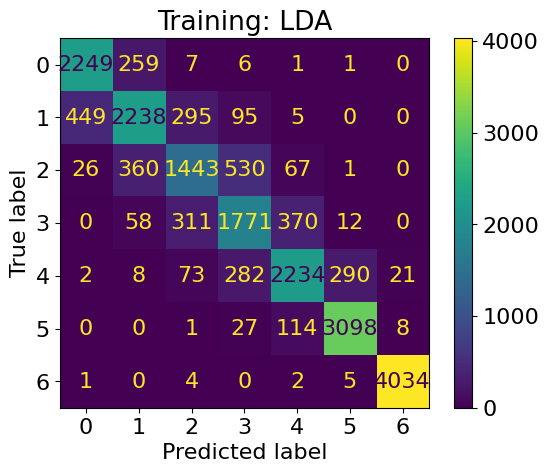

In [110]:
# Confusion matrix
cmTrain = confusion_matrix(y,lda_pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=LDAmodel.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: LDA')
plt.show()

#### __Naïve Bayes  model__

In [111]:
# fit naive Bayes model on training data
NBmodel = GaussianNB()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) 

# evaluate the model and collect the scores 
n_scores = cross_val_score(NBmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 

# report the model performance 
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores))) 
NB1=NBmodel.fit(X,y) 
print( NB1.score(X,y)) 
NB1pred=NB1.predict(X) 
print(cr(y,NB1pred)) 

Mean Accuracy: 0.617 (0.010)
0.6186048752288275
              precision    recall  f1-score   support

           0       0.58      0.85      0.69      2523
           1       0.56      0.22      0.32      3082
           2       0.64      0.25      0.36      2427
           3       0.49      0.27      0.35      2522
           4       0.37      0.55      0.45      2910
           5       0.62      0.95      0.75      3248
           6       0.96      1.00      0.98      4046

    accuracy                           0.62     20758
   macro avg       0.60      0.58      0.56     20758
weighted avg       0.62      0.62      0.59     20758



In [112]:
print('Classes:',"\n",NB1.classes_)
print('Class Prior Probabilities:',"\n",NB1.class_prior_)
print('mean of each feature per class:',"\n",NB1.theta_)
print('variance of each feature per class:',"\n",NB1.var_)

Classes: 
 [0 1 2 3 4 5 6]
Class Prior Probabilities: 
 [0.1215435  0.14847288 0.11691878 0.12149533 0.14018692 0.15646979
 0.1949128 ]
mean of each feature per class: 
 [[-7.92080450e-01 -1.89574793e-01 -1.44157369e+00  6.34789016e-02
   2.24314760e-01 -4.68820866e-01  2.62484106e-01  3.09159020e-01
   3.57510900e-01  5.74316290e-01  1.46650813e-01  9.97225525e-01
   9.08045977e-01  6.42092747e-01  3.52358304e-01  1.38723742e-02
   5.02576298e-01  3.17082838e-03  1.09789933e-01  7.92707095e-04
   1.58541419e-03  2.93301625e-02]
 [-5.34537849e-01 -3.37887884e-01 -9.99077725e-01 -1.38144598e-01
   1.81779216e-01 -3.66855231e-01  2.47927583e-01  2.23543044e-02
   4.61388709e-01  4.19208306e-01  1.60609994e-01  9.85074627e-01
   9.48085659e-01  6.29461389e-01  3.48475016e-01  8.92277742e-02
   6.70019468e-01  1.16807268e-02  1.00259572e-01  4.54250487e-03
   5.51589877e-03  5.74302401e-02]
 [-1.40052161e-01 -1.53076481e-01 -5.17821075e-01 -3.55070442e-01
  -3.30547345e-01  6.56544343e-02 

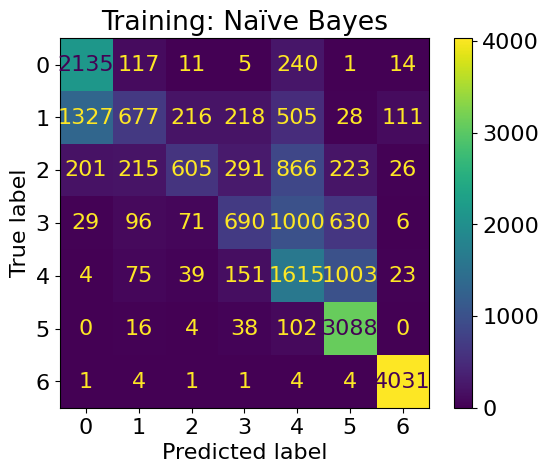

In [113]:
# Confusion matrix
cmTrain = confusion_matrix(y,NB1pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=NB1.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: Naïve Bayes')
plt.show()

#### __Support Vector Machine (SVM)  model__

In [114]:
# fit SVM model on training data
SVMmodel=svc()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate the model and collect the scores
n_scores = cross_val_score(SVMmodel, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report the model performance&nbsp;
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))
SVM1=SVMmodel.fit(X,y)
print( SVM1.score(X,y))
SVM1pred=SVM1.predict(X)
print(cr(y,SVM1pred))

Mean Accuracy: 0.750 (0.007)
0.7516620098275364
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2523
           1       0.62      0.67      0.64      3082
           2       0.60      0.35      0.45      2427
           3       0.55      0.43      0.48      2522
           4       0.59      0.68      0.63      2910
           5       0.86      0.97      0.91      3248
           6       0.99      1.00      0.99      4046

    accuracy                           0.75     20758
   macro avg       0.72      0.72      0.71     20758
weighted avg       0.74      0.75      0.74     20758



In [115]:
print('Coefficients:',"\n",SVM1.coef_)
print('Intercepts:',"\n",SVM1.intercept_)
print('Classes:',"\n",SVM1.classes_)

Coefficients: 
 [[-9.02666558e-02  6.06703797e-01 -3.57332311e+00  5.45285298e-02
   2.57737440e-02  4.01617666e-02  2.57250812e-03  8.42077421e-02
   9.83465556e-02  6.10271873e-02  3.14482524e-03  2.30964109e-01
  -2.93802031e-02  3.08046990e-01  3.63877679e-01 -7.15899808e-01
  -2.85007712e-01 -5.60270789e-01  4.05110845e-01 -2.00705449e-01
  -4.25419025e-01 -1.89420963e-01]
 [-5.22797758e-02 -5.29238548e-02 -4.79651056e-01  1.37930505e-02
   8.34514430e-02 -4.84489681e-02  1.94341128e-02 -7.24508548e-02
   1.91271144e-01 -1.08464129e-03  1.00911244e-03 -2.84786179e-01
   2.24867989e-01  4.30631940e-02  7.53645227e-02  7.77216626e-01
   1.77260845e-01 -9.87816607e-02 -1.66301823e-01  3.38504266e-01
   3.68825118e-01  2.07914417e-01]
 [-7.32123906e-03 -6.47425554e-03 -1.66333013e-01 -4.70515890e-02
  -6.32110928e-02  5.88434847e-02  2.70455058e-02 -2.86697368e-02
   7.20543793e-02 -1.92949728e-02 -1.08252534e-01  3.33115883e-03
  -4.10539247e-01 -1.66631605e-01 -4.15723329e-01  6.946

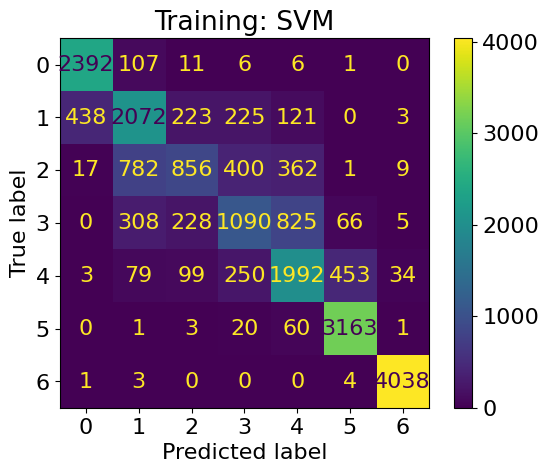

In [116]:
# Confusion matrix
cmTrain = confusion_matrix(y,SVM1pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=SVM1.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: SVM')
plt.show()

#### __Assess model assumptions__

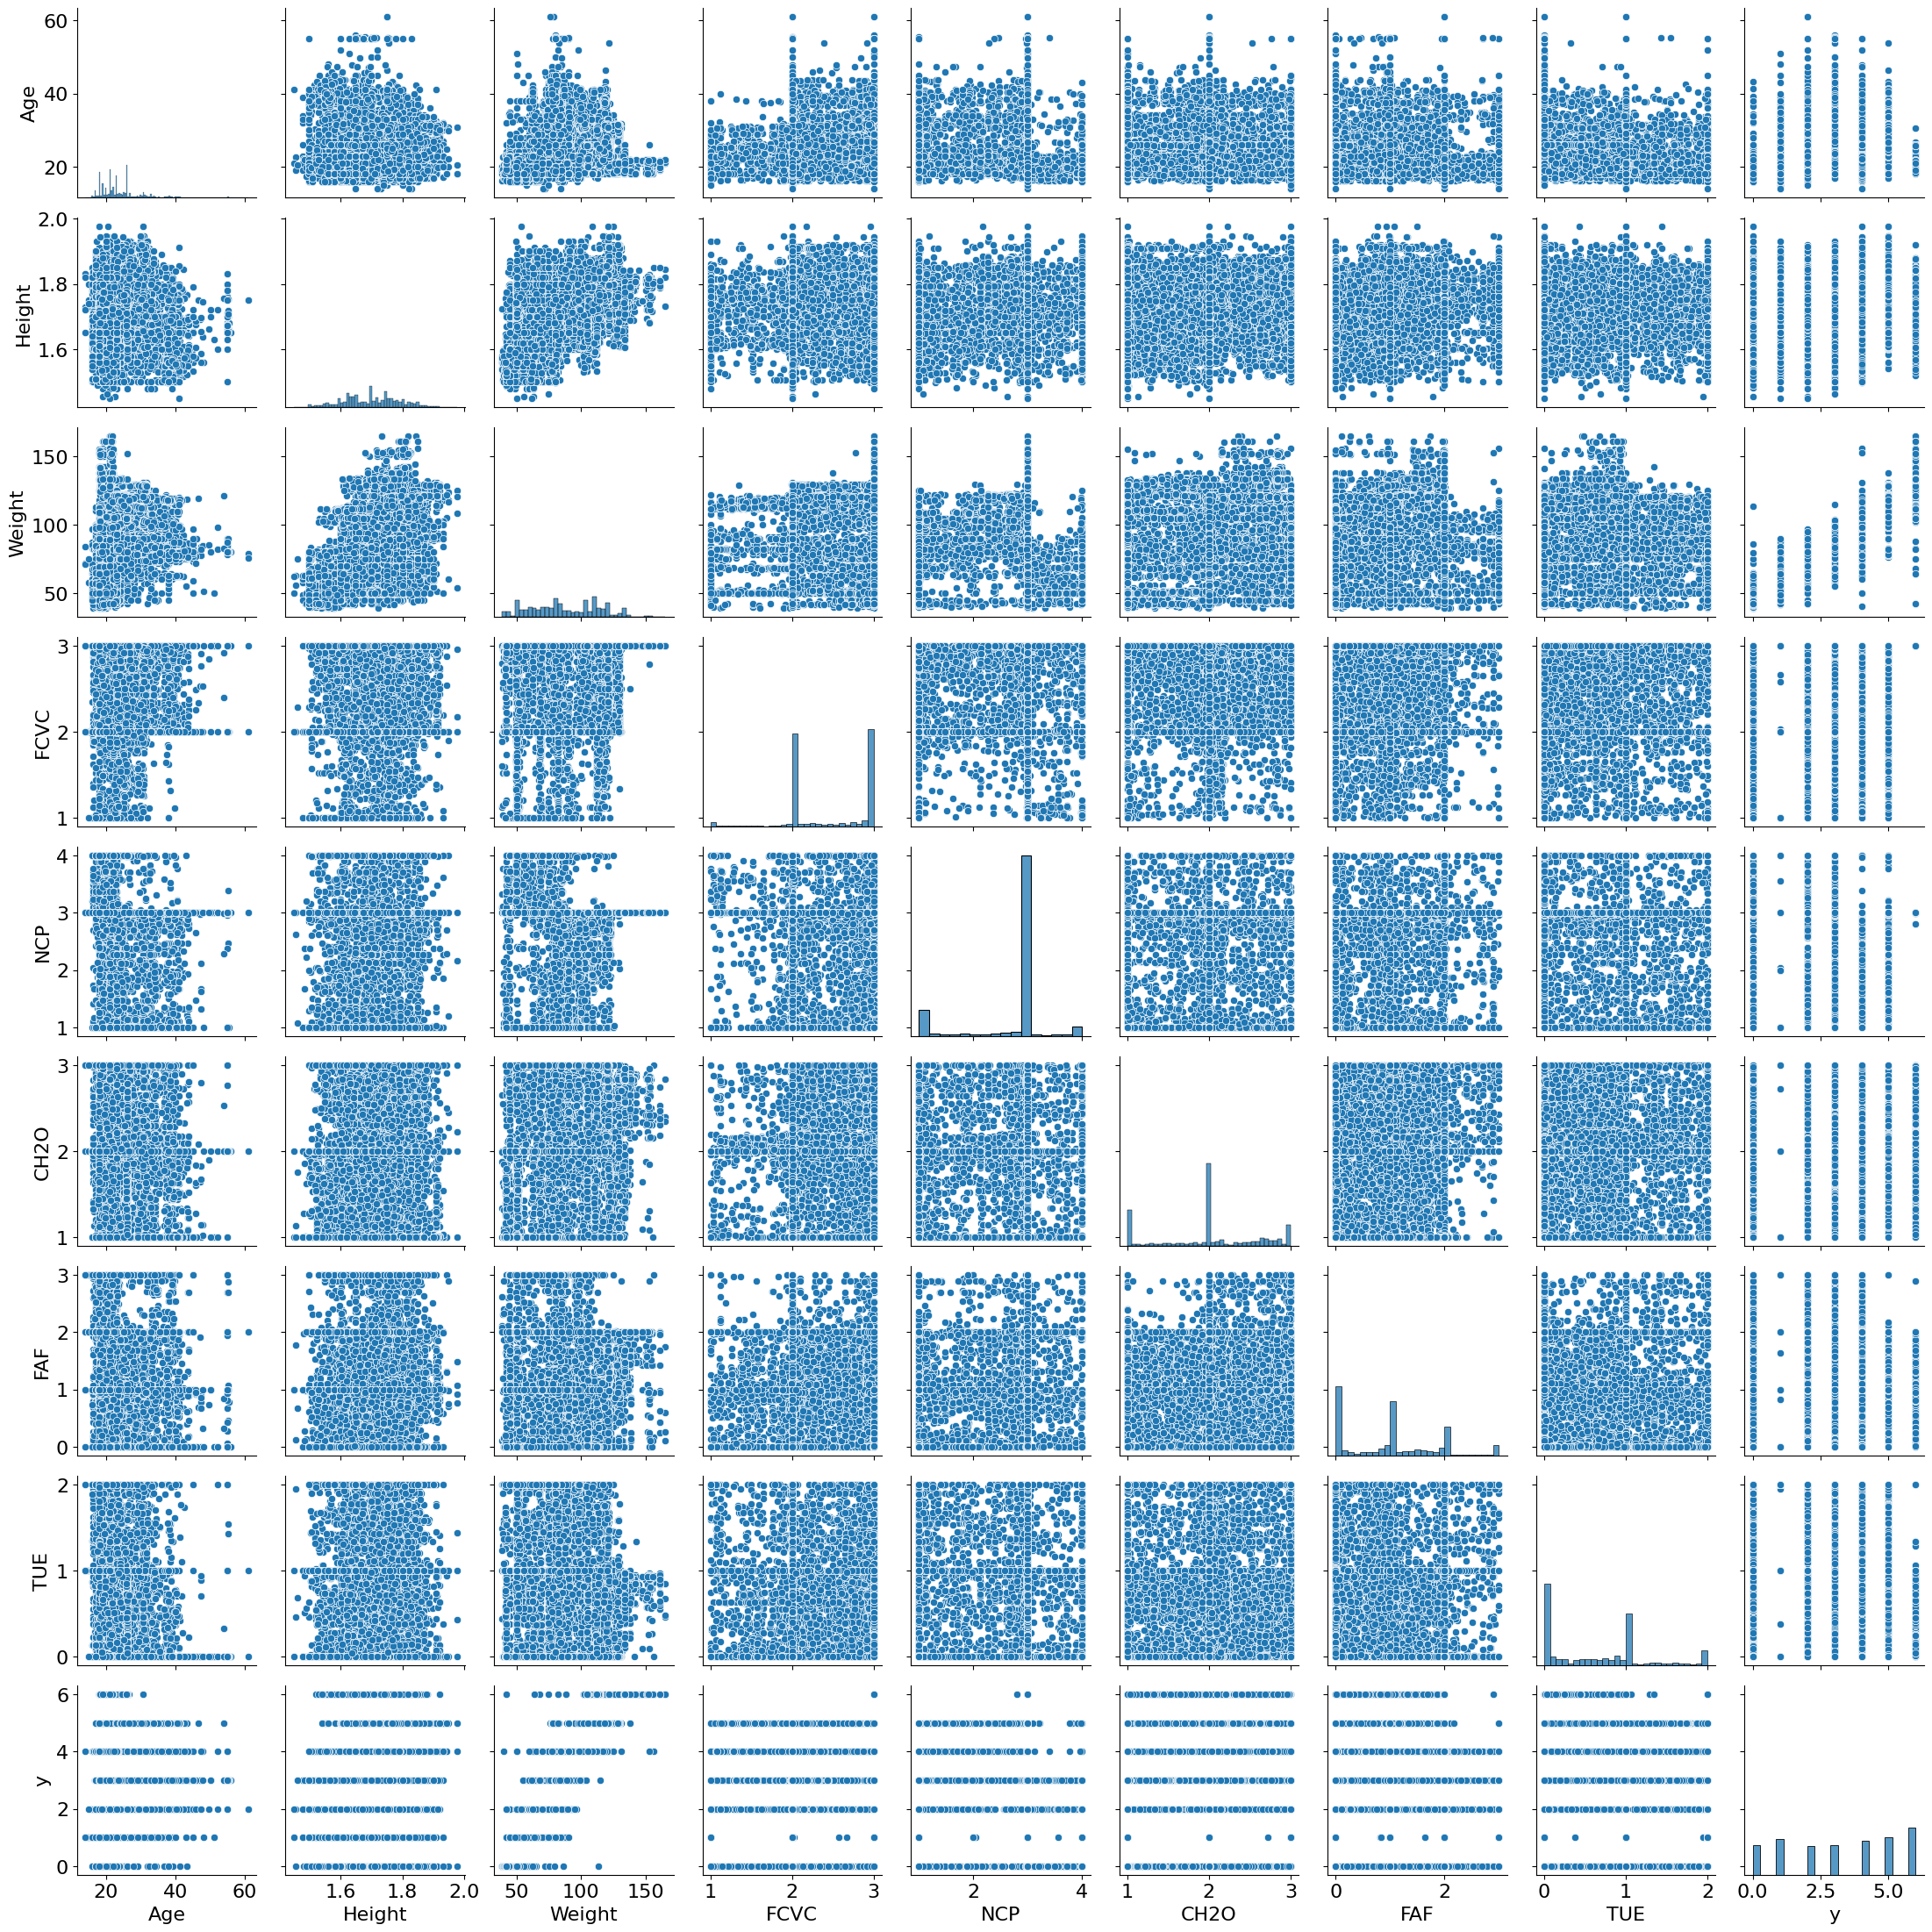

In [117]:
# generate pairs plot to check distribution of quantitative variables for each class of dependent variable
sns.pairplot(ObeseTrain)
plt.show()

<Axes: >

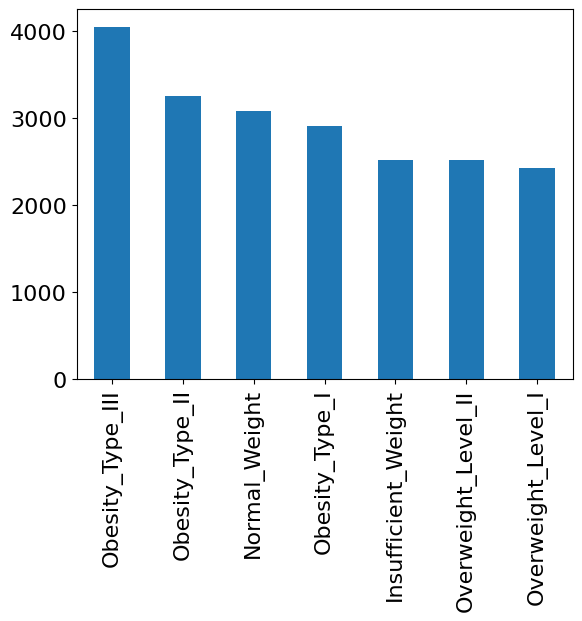

In [118]:
# plot distribution of target variable
ObeseTrain['NObeyesdad'].value_counts().plot(kind='bar')

#### __Generate predictions on the test data__

##### __Test data preprocessing and feature engineering__

In [119]:
# import training data
ObeseTest = pd.read_csv(r'./test.csv',index_col=0)

# rename the variable family_history_with_overweight to shorter FHWO
ObeseTest.rename(columns={"family_history_with_overweight":"FHWO"},inplace=True)

# check data types of columns
ObeseTest

Gender        Age    Height      Weight FHWO FAVC      FCVC       NCP  \
id                                                                             
20758    Male  26.899886  1.848294  120.644178  yes  yes  2.938616  3.000000   
20759  Female  21.000000  1.600000   66.000000  yes  yes  2.000000  1.000000   
20760  Female  26.000000  1.643355  111.600553  yes  yes  3.000000  3.000000   
20761    Male  20.979254  1.553127  103.669116  yes  yes  2.000000  2.977909   
20762  Female  26.000000  1.627396  104.835346  yes  yes  3.000000  3.000000   
...       ...        ...       ...         ...  ...  ...       ...       ...   
34593    Male  23.327836  1.721384   78.030383  yes   no  2.813234  3.000000   
34594  Female  29.000000  1.590000   62.000000   no  yes  3.000000  3.000000   
34595  Female  22.935612  1.585547   44.376637   no  yes  3.000000  2.273740   
34596    Male  21.000000  1.620000   53.000000  yes  yes  2.000000  3.000000   
34597    Male  26.490926  1.812259  120.980508  yes  yes  2.744994  3.000000   

             CAEC SMOKE      CH2O SCC       FAF       TUE       CALC  \
id                                                                     
20758   Sometimes    no  2.825629  no  0.855400  0.000000  Sometimes   
20759   Sometimes    no  3.000000  no  1.000000  0.000000  Sometimes   
20760   Sometimes    no  2.621877  no  0.000000  0.250502  Sometimes   
20761   Sometimes    no  2.786417  no  0.094851  0.000000  Sometimes   
20762   Sometimes    no  2.653531  no  0.000000  0.741069  Sometimes   
...           ...   ...       ...  ..       ...       ...        ...   
34593   Sometimes    no  1.000000  no  0.807076  0.778632  Sometimes   
34594   Sometimes    no  2.000000  no  0.000000  0.000000  Sometimes   
34595  Frequently    no  2.000000  no  1.949840  1.000000  Sometimes   
34596   Sometimes    no  2.000000  no  3.000000  2.000000         no   
34597   Sometimes    no  2.205977  no  1.304291  0.630866  Sometimes   

                      MTRANS  
id                            
20758  Public_Transportation  
20759  Public_Transportation  
20760  Public_Transportation  
20761  Public_Transportation  
20762  Public_Transportation  
...                      ...  
34593  Public_Transportation  
34594  Public_Transportation  
34595  Public_Transportation  
34596  Public_Transportation  
34597  Public_Transportation  

[13840 rows x 16 columns]

In [120]:
# check for missing values
print(ObeseTest.isnull().sum())

Gender    0
Age       0
Height    0
Weight    0
FHWO      0
FAVC      0
FCVC      0
NCP       0
CAEC      0
SMOKE     0
CH2O      0
SCC       0
FAF       0
TUE       0
CALC      0
MTRANS    0
dtype: int64


In [121]:
# check distribution of CALC 
ObeseTest.CALC.value_counts(dropna=False)

Sometimes     9979
no            3513
Frequently     346
Always           2
Name: CALC, dtype: int64

In [122]:
# Generate dummy variables for qualitative variables
qualVarsTest = ObeseTest[['Gender','FHWO','FAVC','SMOKE','SCC','CALC','CAEC','MTRANS']]
qualVarsTest = pd.get_dummies(qualVarsTest)
qualVarsTest.columns

Index(['Gender_Female', 'Gender_Male', 'FHWO_no', 'FHWO_yes', 'FAVC_no',
       'FAVC_yes', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always',
       'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'CAEC_Always',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'],
      dtype='object')

In [123]:
# standardize the quantitative variables
quantVarsTest = ObeseTest[['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']]

scaler.fit(quantVarsTest)

Xtest_std = scaler.transform(quantVarsTest)

quantVarsTest_std = pd.DataFrame( Xtest_std , columns=quantVarsTest.columns, index = quantVarsTest.index)
quantVarsTest_std

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
id                                                                            
20758  0.508163  1.682789  1.273786  0.932524  0.350808  1.298389 -0.141769   
20759 -0.509128 -1.114658 -0.818988 -0.833161 -2.462523  1.583678  0.030307   
20760  0.353000 -0.626191  0.927432  1.047997  0.350808  0.965029 -1.159701   
20761 -0.512705 -1.642760  0.623672 -0.833161  0.319733  1.234234 -1.046828   
20762  0.353000 -0.805996  0.668336  1.047997  0.350808  1.016818 -1.159701   
...         ...       ...       ...       ...       ...       ...       ...   
34593 -0.107749  0.252936 -0.358246  0.696661  0.350808 -1.688533 -0.199274   
34594  0.870277 -1.227324 -0.972181  1.047997  0.350808 -0.052428 -1.159701   
34595 -0.175379 -1.277495 -1.647125  1.047997 -0.670797 -0.052428  1.160623   
34596 -0.509128 -0.889324 -1.316865 -0.833161  0.350808 -0.052428  2.410322   
34597  0.437648  1.276794  1.286667  0.568291  0.350808  0.284573  0.392415   

            TUE  
id               
20758 -1.005016  
20759 -1.005016  
20760 -0.592995  
20761 -1.005016  
20762  0.213881  
...         ...  
34593  0.275664  
34594 -1.005016  
34595  0.639766  
34596  2.284548  
34597  0.032621  

[13840 rows x 8 columns]

In the test data, the variable `CALC` has an additional category "Always" which was not in the training data, so there is a dummy variable column `CALC_Always` in the test data that was not in the training data and so it will be dropped

In [124]:
# combine the standardized quantitative variables and the dummy qualitative variables to make the X_test data frame
X_test = pd.concat([quantVarsTest_std, qualVarsTest], axis=1)

# drop the unneeded dummy variables 
X_test = X_test.drop(columns=['Gender_Female','FHWO_yes','FAVC_yes','SMOKE_yes','SCC_yes',
                              'CALC_Frequently','CAEC_Frequently','CALC_Always','MTRANS_Public_Transportation'])
X_test

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
id                                                                            
20758  0.508163  1.682789  1.273786  0.932524  0.350808  1.298389 -0.141769   
20759 -0.509128 -1.114658 -0.818988 -0.833161 -2.462523  1.583678  0.030307   
20760  0.353000 -0.626191  0.927432  1.047997  0.350808  0.965029 -1.159701   
20761 -0.512705 -1.642760  0.623672 -0.833161  0.319733  1.234234 -1.046828   
20762  0.353000 -0.805996  0.668336  1.047997  0.350808  1.016818 -1.159701   
...         ...       ...       ...       ...       ...       ...       ...   
34593 -0.107749  0.252936 -0.358246  0.696661  0.350808 -1.688533 -0.199274   
34594  0.870277 -1.227324 -0.972181  1.047997  0.350808 -0.052428 -1.159701   
34595 -0.175379 -1.277495 -1.647125  1.047997 -0.670797 -0.052428  1.160623   
34596 -0.509128 -0.889324 -1.316865 -0.833161  0.350808 -0.052428  2.410322   
34597  0.437648  1.276794  1.286667  0.568291  0.350808  0.284573  0.392415   

            TUE  Gender_Male  FHWO_no  ...  SCC_no  CALC_Sometimes  CALC_no  \
id                                     ...                                    
20758 -1.005016            1        0  ...       1               1        0   
20759 -1.005016            0        0  ...       1               1        0   
20760 -0.592995            0        0  ...       1               1        0   
20761 -1.005016            1        0  ...       1               1        0   
20762  0.213881            0        0  ...       1               1        0   
...         ...          ...      ...  ...     ...             ...      ...   
34593  0.275664            1        0  ...       1               1        0   
34594 -1.005016            0        1  ...       1               1        0   
34595  0.639766            0        1  ...       1               1        0   
34596  2.284548            1        0  ...       1               0        1   
34597  0.032621            1        0  ...       1               1        0   

       CAEC_Always  CAEC_Sometimes  CAEC_no  MTRANS_Automobile  MTRANS_Bike  \
id                                                                            
20758            0               1        0                  0            0   
20759            0               1        0                  0            0   
20760            0               1        0                  0            0   
20761            0               1        0                  0            0   
20762            0               1        0                  0            0   
...            ...             ...      ...                ...          ...   
34593            0               1        0                  0            0   
34594            0               1        0                  0            0   
34595            0               0        0                  0            0   
34596            0               1        0                  0            0   
34597            0               1        0                  0            0   

       MTRANS_Motorbike  MTRANS_Walking  
id                                       
20758                 0               0  
20759                 0               0  
20760                 0               0  
20761                 0               0  
20762                 0               0  
...                 ...             ...  
34593                 0               0  
34594                 0               0  
34595                 0               0  
34596                 0               0  
34597                 0               0  

[13840 rows x 22 columns]

In [125]:
# Reverse mapping from numeric value to qualitative value of NObeyesdad
NObeyesdad_revmap = {0:'Insufficient_Weight',
                     1:'Normal_Weight',
                     2:'Overweight_Level_I',
                     3:'Overweight_Level_II',
                     4:'Obesity_Type_I',
                     5:'Obesity_Type_II',
                     6:'Obesity_Type_III'
                     }

##### __Multinomial Logistic Regression predictions on Test__

In [126]:
y_LR1pred=LR1.predict(X_test)

MLR1_Submission = pd.DataFrame( y_LR1pred , columns=['y_pred'], index = X_test.index)
MLR1_Submission = MLR1_Submission.assign(NObeyesdad = MLR1_Submission.y_pred.map(NObeyesdad_revmap))
MLR1_Submission.drop('y_pred', axis=1, inplace=True)
MLR1_Submission.to_csv(r'MLR1_ObesitySubmission.csv', index = True)
MLR1_Submission

NObeyesdad
id                        
20758      Obesity_Type_II
20759   Overweight_Level_I
20760     Obesity_Type_III
20761       Obesity_Type_I
20762     Obesity_Type_III
...                    ...
34593  Overweight_Level_II
34594   Overweight_Level_I
34595  Insufficient_Weight
34596        Normal_Weight
34597      Obesity_Type_II

[13840 rows x 1 columns]

##### __LDA predictions on Test__

In [127]:
y_LDA1pred=LDAmodel.predict(X_test)

LDA1_Submission = pd.DataFrame( y_LDA1pred , columns=['y_pred'], index = X_test.index)
LDA1_Submission = LDA1_Submission.assign(NObeyesdad = LDA1_Submission.y_pred.map(NObeyesdad_revmap))
LDA1_Submission.drop('y_pred', axis=1, inplace=True)
LDA1_Submission.to_csv(r'LDA1_ObesitySubmission.csv', index = True)
LDA1_Submission

NObeyesdad
id                        
20758      Obesity_Type_II
20759   Overweight_Level_I
20760     Obesity_Type_III
20761      Obesity_Type_II
20762     Obesity_Type_III
...                    ...
34593  Overweight_Level_II
34594   Overweight_Level_I
34595  Insufficient_Weight
34596        Normal_Weight
34597      Obesity_Type_II

[13840 rows x 1 columns]

##### __Naïve Bayes predictions on Test__

In [128]:
y_NB1pred=NB1.predict(X_test)

NB1_Submission = pd.DataFrame( y_NB1pred , columns=['y_pred'], index = X_test.index)
NB1_Submission = NB1_Submission.assign(NObeyesdad = NB1_Submission.y_pred.map(NObeyesdad_revmap))
NB1_Submission.drop('y_pred', axis=1, inplace=True)
NB1_Submission.to_csv(r'NB1_ObesitySubmission.csv', index = True)
NB1_Submission

NObeyesdad
id                        
20758      Obesity_Type_II
20759       Obesity_Type_I
20760       Obesity_Type_I
20761      Obesity_Type_II
20762       Obesity_Type_I
...                    ...
34593  Overweight_Level_II
34594   Overweight_Level_I
34595  Insufficient_Weight
34596  Insufficient_Weight
34597      Obesity_Type_II

[13840 rows x 1 columns]

##### __SVM predictions on Test__

In [129]:
y_SVM1pred=SVM1.predict(X_test)

SVM1_Submission = pd.DataFrame( y_SVM1pred , columns=['y_pred'], index = X_test.index)
SVM1_Submission = SVM1_Submission.assign(NObeyesdad = SVM1_Submission.y_pred.map(NObeyesdad_revmap))
SVM1_Submission.drop('y_pred', axis=1, inplace=True)
SVM1_Submission.to_csv(r'SVM1_ObesitySubmission.csv', index = True)
SVM1_Submission

NObeyesdad
id                        
20758      Obesity_Type_II
20759       Obesity_Type_I
20760     Obesity_Type_III
20761      Obesity_Type_II
20762     Obesity_Type_III
...                    ...
34593  Overweight_Level_II
34594        Normal_Weight
34595  Insufficient_Weight
34596        Normal_Weight
34597      Obesity_Type_II

[13840 rows x 1 columns]

In [130]:
# Print Python version
import sys
print(sys.version)

# Print Jupyter notebook version
import notebook
notebook.__version__

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


'7.2.2'

In [131]:
!jupyter --version

Selected Jupyter core packages...
IPython          : 8.29.0
ipykernel        : 6.29.5
ipywidgets       : not installed
jupyter_client   : 8.6.3
jupyter_core     : 5.7.2
jupyter_server   : 2.14.2
jupyterlab       : 4.2.6
nbclient         : 0.10.0
nbconvert        : 7.16.4
nbformat         : 5.10.4
notebook         : 7.2.2
qtconsole        : not installed
traitlets        : 5.14.3
